In [1]:
import os
if os.getcwd() == '/home/user/code':
    os.chdir('/home/user/code/nlp2024_ClefTask4SOTA')

In [2]:
from TexSoup import TexSoup

def split_into_sections(tex):
    """returns: List of tuples (section_name, section_text)"""
    soup = TexSoup(tex)

    doc_text = tex

    sections = []

    sections.append(("title", soup.title.contents[0])) if soup.title else None
    sections.append(("abstract", soup.abstract.contents[0])) if soup.abstract else None
    sections.append(("tables", "\n".join([str(node) for node in soup.find_all("table")]))) if soup.find_all("table") else None


    # extract latex sections and corresponding text
    prev_section = "pre"

    for node in soup.find_all("section"):
        section_text, doc_text = doc_text.split(str(node), 1)
        sections.append((prev_section, section_text))
        prev_section = node.contents[0]
    sections.append((prev_section, doc_text))
    return sections

In [3]:
# TODO: Define Prompt function
import ollama

model = "llama3:8b"

def contains_qradruple(tex):
    return f"Decide if if the following text mentions a result on a benchmark leaderboard, including the task, dataset, metric and the score. \
    Ignore the content of the text, only output yes, if it contains a leaderboard mention or no, if no such information is included. \n \
    Text: \n {tex} \n \
    Answer with yes or no only without providing any other text. "

def zs(prompt):
    res = ollama.generate(model=model, prompt=prompt)
    context_len = len(res["context"])
    # print(f"context lenght: {context_len}")
    return res["response"]



In [4]:
def section_wise_detection(tex):
    answers = []
    try:
        sections = split_into_sections(tex)
    except:
        sections = [("full", tex)] # in the case the structure cannot be parsed:
    print(f"{len(sections)} sections")
    for section_name, section_text in sections:
        answers.append(str(zs(contains_qradruple(section_text))).lower())

    return any([answer == 'yes' for answer in answers])

   

In [5]:
# run on train data to evaluate method
from tqdm import tqdm
from dataset import BinaryTDMSDataset, PATH

from datetime import datetime



execution_start = datetime.now().strftime("%m%d%Y-%H%M%S")

train_dataset = BinaryTDMSDataset(PATH.TRAIN)


results = []
# for i in tqdm(range(len(train_dataset))):
for i in tqdm(range(2000)):
    f, tex, ground_truth = train_dataset.__getitem__(i)
    pred = section_wise_detection(tex)
    print(f"{f}: {pred} ({ground_truth})")
    results.append((f, ground_truth, pred))

import pandas as pd

df = pd.DataFrame(results)
df.columns = ["file", "ground_truth", "pred"]

df.to_feather(f"results/zs_train_{execution_start}.feather")


  0%|                                                                                                 | 0/2000 [00:00<?, ?it/s]

10 sections


  0%|                                                                                       | 1/2000 [00:08<4:33:05,  8.20s/it]

2205.07139v1: True (True)
13 sections


  0%|                                                                                       | 2/2000 [00:20<5:53:43, 10.62s/it]

1908.04531v2: True (True)
1 sections


  0%|▏                                                                                      | 3/2000 [00:22<3:44:12,  6.74s/it]

1007.3769: False (False)
1 sections


  0%|▏                                                                                      | 4/2000 [00:24<2:46:18,  5.00s/it]

1408.5825: False (False)
19 sections


  0%|▏                                                                                      | 5/2000 [00:42<5:20:59,  9.65s/it]

2104.08663v2: True (False)
10 sections


  0%|▎                                                                                      | 6/2000 [00:53<5:27:31,  9.86s/it]

1911.04127v1: True (True)
11 sections


  0%|▎                                                                                      | 7/2000 [01:03<5:37:28, 10.16s/it]

1511.03407: True (False)
9 sections


  0%|▎                                                                                      | 8/2000 [01:09<4:49:11,  8.71s/it]

2010.13714v1: True (True)
14 sections


  0%|▍                                                                                      | 9/2000 [01:22<5:31:53, 10.00s/it]

2311.15769v1: True (True)
10 sections


  0%|▍                                                                                     | 10/2000 [01:30<5:15:55,  9.53s/it]

2001.07263v3: True (True)
13 sections


  1%|▍                                                                                     | 11/2000 [01:44<5:54:38, 10.70s/it]

1207.3202: True (False)
1 sections


  1%|▌                                                                                     | 12/2000 [01:51<5:18:46,  9.62s/it]

2302.09473v2: False (True)
10 sections


  1%|▌                                                                                     | 13/2000 [02:00<5:10:28,  9.38s/it]

2105.09511v3: True (True)
10 sections


  1%|▌                                                                                     | 14/2000 [02:11<5:33:12, 10.07s/it]

1603.01417v1: True (True)


  1%|█▏                                                                                    | 29/2000 [04:02<4:23:03,  8.01s/it]

2011.11164v2: True (True)
9 sections


  2%|█▎                                                                                    | 30/2000 [04:09<4:21:48,  7.97s/it]

1406.1818: True (False)
13 sections


  2%|█▎                                                                                    | 31/2000 [04:22<5:07:32,  9.37s/it]

2210.16810v3: True (True)
8 sections


  2%|█▍                                                                                    | 32/2000 [04:32<5:14:18,  9.58s/it]

2003.01995v3: True (True)
13 sections


  2%|█▍                                                                                    | 33/2000 [04:43<5:30:44, 10.09s/it]

2109.02499v1: True (True)
17 sections


  2%|█▍                                                                                    | 34/2000 [05:02<6:51:00, 12.54s/it]

2002.06823v1: True (True)
8 sections


  2%|█▌                                                                                    | 35/2000 [05:10<6:07:54, 11.23s/it]

1512.03189: False (False)
1 sections


  2%|█▌                                                                                    | 36/2000 [05:13<4:50:06,  8.86s/it]

1305.1183: True (False)
9 sections


  2%|█▌                                                                                    | 37/2000 [05:20<4:33:26,  8.36s/it]

2012.11389v1: True (True)
8 sections


  2%|█▋                                                                                    | 38/2000 [05:28<4:29:45,  8.25s/it]

2011.08577v1: True (False)
11 sections


  2%|█▋                                                                                    | 39/2000 [05:35<4:17:19,  7.87s/it]

2006.05489v2: True (True)
1 sections


  2%|█▋                                                                                    | 40/2000 [05:43<4:18:10,  7.90s/it]

1309.4693: False (False)
1 sections


  2%|█▊                                                                                    | 41/2000 [05:47<3:39:26,  6.72s/it]

0810.3836: False (False)
10 sections


  2%|█▊                                                                                    | 42/2000 [05:57<4:08:25,  7.61s/it]

1612.00901v1: True (True)
4 sections


  2%|█▊                                                                                    | 43/2000 [06:04<4:03:13,  7.46s/it]

2206.10226v1: False (True)
10 sections


  2%|█▉                                                                                    | 44/2000 [06:13<4:18:38,  7.93s/it]

2309.10667v1: True (True)
1 sections


  2%|█▉                                                                                    | 45/2000 [06:15<3:21:00,  6.17s/it]

2208.04534v3: True (True)
13 sections


  2%|█▉                                                                                    | 46/2000 [06:32<5:05:22,  9.38s/it]

1401.1977: True (False)
9 sections


  2%|██                                                                                    | 47/2000 [06:40<4:54:01,  9.03s/it]

2104.06655v2: True (True)
1 sections


  2%|██                                                                                    | 48/2000 [06:41<3:28:21,  6.40s/it]

0909.1590: False (False)
1 sections


  2%|██                                                                                    | 49/2000 [06:49<3:44:39,  6.91s/it]

1910.10683v4: True (True)
1 sections


  2%|██▏                                                                                   | 50/2000 [06:54<3:25:52,  6.33s/it]

1401.5004: True (False)
9 sections


  3%|██▏                                                                                   | 51/2000 [07:00<3:24:45,  6.30s/it]

1309.5551: False (False)
8 sections


  3%|██▏                                                                                   | 52/2000 [07:06<3:21:39,  6.21s/it]

2006.12263v1: True (True)
9 sections


  3%|██▎                                                                                   | 53/2000 [07:13<3:29:51,  6.47s/it]

1711.02209v1: True (True)
11 sections


  3%|██▎                                                                                   | 54/2000 [07:24<4:10:52,  7.74s/it]

2210.14913v1: True (True)
9 sections


  3%|██▎                                                                                   | 55/2000 [07:32<4:13:18,  7.81s/it]

1505.04956: True (False)
11 sections


  3%|██▍                                                                                   | 56/2000 [07:48<5:33:19, 10.29s/it]

1306.6109: True (False)
10 sections


  3%|██▍                                                                                   | 57/2000 [07:57<5:22:02,  9.94s/it]

1801.00054v3: True (True)
8 sections


  3%|██▍                                                                                   | 58/2000 [08:05<5:06:41,  9.48s/it]

2108.06119v1: True (True)
11 sections


  3%|██▌                                                                                   | 59/2000 [08:17<5:25:05, 10.05s/it]

1406.1058: True (False)
9 sections


  3%|██▌                                                                                   | 60/2000 [08:26<5:20:43,  9.92s/it]

2003.03955v3: True (True)
10 sections


  3%|██▌                                                                                   | 61/2000 [08:35<5:05:47,  9.46s/it]

2210.14474v1: True (True)
1 sections


  3%|██▋                                                                                   | 62/2000 [08:38<4:02:05,  7.50s/it]

1511.07983: True (False)
11 sections


  3%|██▋                                                                                   | 63/2000 [08:48<4:30:58,  8.39s/it]

1401.2974: False (False)
11 sections


  3%|██▊                                                                                   | 64/2000 [08:58<4:43:59,  8.80s/it]

1512.02881: False (False)
9 sections


  3%|██▊                                                                                   | 65/2000 [09:05<4:28:02,  8.31s/it]

1611.01734v3: True (True)
17 sections


  3%|██▊                                                                                   | 66/2000 [09:23<5:58:20, 11.12s/it]

1911.13239v3: True (True)
10 sections


  3%|██▉                                                                                   | 67/2000 [09:33<5:53:44, 10.98s/it]

1711.06025v2: True (True)
10 sections


  3%|██▉                                                                                   | 68/2000 [09:45<5:58:25, 11.13s/it]

1304.1423: True (False)
9 sections


  3%|██▉                                                                                   | 69/2000 [09:56<6:03:24, 11.29s/it]

1603.06180v1: True (True)
1 sections


  4%|███                                                                                   | 70/2000 [10:07<5:57:53, 11.13s/it]

1012.4890: True (False)
10 sections


  4%|███                                                                                   | 71/2000 [10:20<6:18:53, 11.79s/it]

2104.10538v1: True (True)
10 sections


  4%|███                                                                                   | 72/2000 [10:30<5:58:53, 11.17s/it]

2111.14842v1: True (True)
9 sections


  4%|███▏                                                                                  | 73/2000 [10:43<6:12:56, 11.61s/it]

1902.03084v2: True (True)
9 sections


  4%|███▏                                                                                  | 74/2000 [10:55<6:15:07, 11.69s/it]

2107.00652v3: True (True)
10 sections


  4%|███▏                                                                                  | 75/2000 [11:07<6:21:04, 11.88s/it]

2104.02008v1: True (True)
13 sections


  4%|███▎                                                                                  | 76/2000 [11:21<6:39:17, 12.45s/it]

1809.06858v2: True (True)
11 sections


  4%|███▎                                                                                  | 77/2000 [11:36<7:03:08, 13.20s/it]

1307.6958: False (False)
12 sections


  4%|███▎                                                                                  | 78/2000 [11:51<7:21:17, 13.78s/it]

2007.09493v1: True (True)
1 sections


  4%|███▍                                                                                  | 79/2000 [11:54<5:41:24, 10.66s/it]

2007.01807v2: True (True)
1 sections


  4%|███▍                                                                                  | 80/2000 [11:58<4:33:13,  8.54s/it]

1702.06921v1: True (True)
10 sections


  4%|███▍                                                                                  | 81/2000 [12:11<5:13:12,  9.79s/it]

2103.17235v3: True (True)
9 sections


  4%|███▌                                                                                  | 82/2000 [12:18<4:52:52,  9.16s/it]

2303.08253v1: True (True)
9 sections


  4%|███▌                                                                                  | 83/2000 [12:27<4:51:27,  9.12s/it]

2111.07910v2: True (True)
13 sections


  4%|███▌                                                                                  | 84/2000 [12:36<4:45:46,  8.95s/it]

1709.07432v2: True (True)
13 sections


  4%|███▋                                                                                  | 85/2000 [12:50<5:40:03, 10.65s/it]

2008.01068v2: True (True)
12 sections


  4%|███▋                                                                                  | 86/2000 [13:00<5:30:10, 10.35s/it]

1411.5455: False (False)
13 sections


  4%|███▋                                                                                  | 87/2000 [13:12<5:48:27, 10.93s/it]

2206.09113v2: True (True)
1 sections


  4%|███▊                                                                                  | 88/2000 [13:17<4:49:26,  9.08s/it]

0905.4090: False (False)
1 sections


  4%|███▊                                                                                  | 89/2000 [13:21<3:56:19,  7.42s/it]

1508.01651: False (False)
13 sections


  4%|███▊                                                                                  | 90/2000 [13:35<5:00:26,  9.44s/it]

1907.10903v4: True (True)
2 sections


  5%|███▉                                                                                  | 91/2000 [13:38<4:00:35,  7.56s/it]

1903.06256v1: True (True)
1 sections


  5%|███▉                                                                                  | 92/2000 [13:39<2:59:57,  5.66s/it]

1811.00002v1: False (True)
5 sections


  5%|███▉                                                                                  | 93/2000 [13:46<3:08:20,  5.93s/it]

2012.03868v2: True (True)
12 sections


  5%|████                                                                                  | 94/2000 [13:58<4:03:52,  7.68s/it]

2203.11335v1: True (True)
1 sections


  5%|████                                                                                  | 95/2000 [13:58<2:53:05,  5.45s/it]

1505.00430: False (False)
10 sections


  5%|████▏                                                                                 | 96/2000 [14:08<3:41:20,  6.97s/it]

1601.06733v7: True (True)
1 sections


  5%|████▏                                                                                 | 97/2000 [14:12<3:13:28,  6.10s/it]

2206.00664v1: False (True)
11 sections


  5%|████▏                                                                                 | 98/2000 [14:22<3:50:00,  7.26s/it]

1907.10738v1: True (True)
10 sections


  5%|████▎                                                                                 | 99/2000 [14:34<4:29:42,  8.51s/it]

2103.11731v2: True (False)
10 sections


  5%|████▎                                                                                | 100/2000 [14:42<4:25:01,  8.37s/it]

2307.00407v1: True (True)
11 sections


  5%|████▎                                                                                | 101/2000 [14:55<5:10:49,  9.82s/it]

1710.10916v3: True (True)
11 sections


  5%|████▎                                                                                | 102/2000 [15:06<5:18:21, 10.06s/it]

2108.08363v1: True (True)
1 sections


  5%|████▍                                                                                | 103/2000 [15:07<3:56:39,  7.49s/it]

1509.07202: False (False)
1 sections


  5%|████▍                                                                                | 104/2000 [15:09<3:07:41,  5.94s/it]

1207.2017: False (False)
8 sections


  5%|████▍                                                                                | 105/2000 [15:19<3:39:35,  6.95s/it]

1303.4924: False (False)
12 sections


  5%|████▌                                                                                | 106/2000 [15:37<5:30:24, 10.47s/it]

2303.13496v2: True (True)
4 sections


  5%|████▌                                                                                | 107/2000 [15:42<4:37:07,  8.78s/it]

2312.02139v1: True (True)
9 sections


  5%|████▌                                                                                | 108/2000 [15:52<4:48:07,  9.14s/it]

2005.09704v1: True (True)
3 sections


  5%|████▋                                                                                | 109/2000 [15:57<4:04:09,  7.75s/it]

2106.08543v3: True (True)
13 sections


  6%|████▋                                                                                | 110/2000 [16:12<5:13:23,  9.95s/it]

2012.15832v1: True (False)
1 sections


  6%|████▋                                                                                | 111/2000 [16:13<3:46:41,  7.20s/it]

1206.0107: False (False)
12 sections


  6%|████▊                                                                                | 112/2000 [16:26<4:44:13,  9.03s/it]

2103.16746v1: True (True)
1 sections


  6%|████▊                                                                                | 113/2000 [16:29<3:47:45,  7.24s/it]

1605.08616: False (False)
12 sections


  6%|████▊                                                                                | 114/2000 [16:41<4:36:18,  8.79s/it]

2208.08599v2: True (True)
7 sections


  6%|████▉                                                                                | 115/2000 [16:46<3:57:19,  7.55s/it]

1510.00740: True (False)
2 sections


  6%|████▉                                                                                | 116/2000 [16:49<3:09:28,  6.03s/it]

2103.01520v2: True (True)
13 sections


  6%|████▉                                                                                | 117/2000 [17:02<4:21:12,  8.32s/it]

2308.04556v1: True (True)
11 sections


  6%|█████                                                                                | 118/2000 [17:15<5:01:35,  9.62s/it]

2106.15853v1: True (True)
9 sections


  6%|█████                                                                                | 119/2000 [17:23<4:47:01,  9.16s/it]

2210.02762v3: True (True)
10 sections


  6%|█████                                                                                | 120/2000 [17:32<4:49:25,  9.24s/it]

1612.06321v4: True (True)
8 sections


  6%|█████▏                                                                               | 121/2000 [17:42<4:54:18,  9.40s/it]

2210.07233v1: True (True)
9 sections


  6%|█████▏                                                                               | 122/2000 [17:51<4:48:36,  9.22s/it]

2109.02137v2: True (True)
9 sections


  6%|█████▏                                                                               | 123/2000 [18:02<5:03:07,  9.69s/it]

2210.08290v1: True (True)
11 sections


  6%|█████▎                                                                               | 124/2000 [18:15<5:37:57, 10.81s/it]

2006.04647v2: True (False)
9 sections


  6%|█████▎                                                                               | 125/2000 [18:28<5:56:48, 11.42s/it]

1603.01181: True (False)
1 sections


  6%|█████▎                                                                               | 126/2000 [18:30<4:29:08,  8.62s/it]

1211.1658: True (False)
10 sections


  6%|█████▍                                                                               | 127/2000 [18:40<4:39:18,  8.95s/it]

1606.02270v2: True (True)
11 sections


  6%|█████▍                                                                               | 128/2000 [18:53<5:17:07, 10.16s/it]

1412.5034: False (False)
9 sections


  6%|█████▍                                                                               | 129/2000 [19:03<5:20:49, 10.29s/it]

1208.2752: False (False)
12 sections


  6%|█████▌                                                                               | 130/2000 [19:18<5:58:29, 11.50s/it]

1410.1389: True (False)
9 sections


  7%|█████▌                                                                               | 131/2000 [19:29<5:55:41, 11.42s/it]

1611.10012v3: True (True)
2 sections


  7%|█████▌                                                                               | 132/2000 [19:32<4:35:04,  8.84s/it]

1804.03786v3: True (True)
8 sections


  7%|█████▋                                                                               | 133/2000 [19:38<4:14:53,  8.19s/it]

1304.0917: True (False)
9 sections


  7%|█████▋                                                                               | 134/2000 [19:49<4:32:35,  8.77s/it]

2308.02813v1: True (True)
10 sections


  7%|█████▋                                                                               | 135/2000 [19:59<4:44:38,  9.16s/it]

1710.03476v1: True (True)
10 sections


  7%|█████▊                                                                               | 136/2000 [20:05<4:20:50,  8.40s/it]

1208.2331: False (False)
1 sections


  7%|█████▊                                                                               | 137/2000 [20:10<3:45:29,  7.26s/it]

1308.2149: False (False)
1 sections


  7%|█████▊                                                                               | 138/2000 [20:14<3:12:42,  6.21s/it]

1311.6605: False (False)
11 sections


  7%|█████▉                                                                               | 139/2000 [20:24<3:52:56,  7.51s/it]

1603.05289: True (False)
8 sections


  7%|█████▉                                                                               | 140/2000 [20:30<3:40:27,  7.11s/it]

1206.1358: False (False)
9 sections


  7%|█████▉                                                                               | 141/2000 [20:41<4:10:11,  8.08s/it]

0907.0726: True (False)
16 sections


  7%|██████                                                                               | 142/2000 [20:55<5:04:34,  9.84s/it]

2109.06860v1: True (True)
10 sections


  7%|██████                                                                               | 143/2000 [21:06<5:16:52, 10.24s/it]

2010.04925v4: True (True)
14 sections


  7%|██████                                                                               | 144/2000 [21:18<5:39:32, 10.98s/it]

2111.12264v6: True (True)
9 sections


  7%|██████▏                                                                              | 145/2000 [21:26<5:06:01,  9.90s/it]

1406.4844: True (False)
9 sections


  7%|██████▏                                                                              | 146/2000 [21:33<4:40:57,  9.09s/it]

1309.0392: False (False)
1 sections


  7%|██████▏                                                                              | 147/2000 [21:38<4:04:05,  7.90s/it]

2109.14076v3: True (True)
8 sections


  7%|██████▎                                                                              | 148/2000 [21:45<3:50:36,  7.47s/it]

2107.03098v2: True (True)
10 sections


  7%|██████▎                                                                              | 149/2000 [21:54<4:03:53,  7.91s/it]

2305.08540v1: True (True)
10 sections


  8%|██████▍                                                                              | 150/2000 [22:08<5:04:34,  9.88s/it]

2102.09480v1: True (True)
1 sections


  8%|██████▍                                                                              | 151/2000 [22:11<4:03:39,  7.91s/it]

1403.7014: False (False)
10 sections


  8%|██████▍                                                                              | 152/2000 [22:19<4:00:00,  7.79s/it]

1804.08338v1: True (True)
9 sections


  8%|██████▌                                                                              | 153/2000 [22:29<4:24:27,  8.59s/it]

1204.6179: True (False)
6 sections


  8%|██████▌                                                                              | 154/2000 [22:34<3:50:00,  7.48s/it]

2107.00239v1: True (True)
7 sections


  8%|██████▌                                                                              | 155/2000 [22:40<3:35:18,  7.00s/it]

1302.5820: True (False)
1 sections


  8%|██████▋                                                                              | 156/2000 [22:42<2:48:23,  5.48s/it]

1808.07383v1: True (True)
1 sections


  8%|██████▋                                                                              | 157/2000 [22:46<2:29:29,  4.87s/it]

1706.01554v2: False (True)
2 sections


  8%|██████▋                                                                              | 158/2000 [22:48<2:03:05,  4.01s/it]

1204.5639: False (False)
11 sections


  8%|██████▊                                                                              | 159/2000 [22:59<3:10:07,  6.20s/it]

1905.11641v2: True (True)
18 sections


  8%|██████▊                                                                              | 160/2000 [23:14<4:32:57,  8.90s/it]

2112.07160v2: True (True)
1 sections


  8%|██████▊                                                                              | 161/2000 [23:19<3:59:48,  7.82s/it]

2308.01825v2: True (True)
8 sections


  8%|██████▉                                                                              | 162/2000 [23:22<3:10:09,  6.21s/it]

1908.07141v1: False (True)
9 sections


  8%|██████▉                                                                              | 163/2000 [23:31<3:36:32,  7.07s/it]

1910.08967v2: True (True)
1 sections


  8%|██████▉                                                                              | 164/2000 [23:39<3:45:30,  7.37s/it]

1511.02612: False (False)
9 sections


  8%|███████                                                                              | 165/2000 [23:47<3:50:19,  7.53s/it]

2109.12925v6: True (True)
9 sections


  8%|███████                                                                              | 166/2000 [23:56<4:05:52,  8.04s/it]

2012.07620v2: True (True)
1 sections


  8%|███████                                                                              | 167/2000 [23:59<3:17:44,  6.47s/it]

2302.02871v4: True (True)
10 sections


  8%|███████▏                                                                             | 168/2000 [24:11<4:11:34,  8.24s/it]

1808.02632v1: False (True)
1 sections


  8%|███████▏                                                                             | 169/2000 [24:13<3:15:26,  6.40s/it]

1904.02811v4: False (True)
9 sections


  8%|███████▏                                                                             | 170/2000 [24:22<3:34:54,  7.05s/it]

1810.01170v1: True (True)
11 sections


  9%|███████▎                                                                             | 171/2000 [24:34<4:21:55,  8.59s/it]

2207.09603v2: True (True)
11 sections


  9%|███████▎                                                                             | 172/2000 [24:39<3:51:44,  7.61s/it]

2006.07637v1: True (True)
10 sections


  9%|███████▎                                                                             | 173/2000 [24:51<4:25:58,  8.73s/it]

1307.5076: True (False)
11 sections


  9%|███████▍                                                                             | 174/2000 [25:00<4:30:39,  8.89s/it]

1511.05547v2: True (True)
8 sections


  9%|███████▍                                                                             | 175/2000 [25:11<4:48:51,  9.50s/it]

2102.11417v2: True (True)
12 sections


  9%|███████▍                                                                             | 176/2000 [25:24<5:19:55, 10.52s/it]

2009.13013v1: True (False)
8 sections


  9%|███████▌                                                                             | 177/2000 [25:33<5:04:56, 10.04s/it]

1802.05591v1: True (True)
1 sections


  9%|███████▌                                                                             | 178/2000 [25:35<3:50:49,  7.60s/it]

0905.4745: False (False)
9 sections


  9%|███████▌                                                                             | 179/2000 [25:42<3:48:01,  7.51s/it]

2109.07592v1: True (True)
12 sections


  9%|███████▋                                                                             | 180/2000 [25:54<4:32:45,  8.99s/it]

2207.10589v1: True (True)
12 sections


  9%|███████▋                                                                             | 181/2000 [26:07<5:02:56,  9.99s/it]

2109.07506v1: True (True)
1 sections


  9%|███████▋                                                                             | 182/2000 [26:09<3:52:18,  7.67s/it]

1003.1291: False (False)
1 sections


  9%|███████▊                                                                             | 183/2000 [26:13<3:15:55,  6.47s/it]

1201.6527: False (False)
11 sections


  9%|███████▊                                                                             | 184/2000 [26:27<4:30:33,  8.94s/it]

2204.03645v1: True (True)
3 sections


  9%|███████▊                                                                             | 185/2000 [26:32<3:51:48,  7.66s/it]

2112.09106v1: True (True)
11 sections


  9%|███████▉                                                                             | 186/2000 [26:40<3:57:19,  7.85s/it]

1605.03733: True (False)
1 sections


  9%|███████▉                                                                             | 187/2000 [26:42<3:02:21,  6.04s/it]

1211.6315: True (False)
1 sections


  9%|███████▉                                                                             | 188/2000 [26:52<3:38:21,  7.23s/it]

1507.04405: False (False)
11 sections


  9%|████████                                                                             | 189/2000 [27:03<4:07:06,  8.19s/it]

1906.06906v1: True (True)
1 sections


 10%|████████                                                                             | 190/2000 [27:03<2:55:38,  5.82s/it]

1306.6194: False (False)
1 sections


 10%|████████                                                                             | 191/2000 [27:06<2:34:24,  5.12s/it]

2104.14203v1: False (True)
19 sections


 10%|████████▏                                                                            | 192/2000 [27:27<4:56:52,  9.85s/it]

2308.07124v1: True (True)
7 sections


 10%|████████▏                                                                            | 193/2000 [27:34<4:27:17,  8.88s/it]

1106.5076: True (False)
1 sections


 10%|████████▏                                                                            | 194/2000 [27:36<3:29:17,  6.95s/it]

1309.3914: False (False)
14 sections


 10%|████████▎                                                                            | 195/2000 [27:49<4:24:58,  8.81s/it]

2203.14371v1: True (True)
1 sections


 10%|████████▎                                                                            | 196/2000 [27:52<3:23:40,  6.77s/it]

1507.08398: True (False)
10 sections


 10%|████████▎                                                                            | 197/2000 [28:01<3:44:16,  7.46s/it]

2306.07019v2: True (True)
3 sections


 10%|████████▍                                                                            | 198/2000 [28:06<3:26:44,  6.88s/it]

2109.05014v2: True (True)
2 sections


 10%|████████▍                                                                            | 199/2000 [28:10<2:55:23,  5.84s/it]

2101.07034v3: False (True)
14 sections


 10%|████████▌                                                                            | 200/2000 [28:22<3:50:40,  7.69s/it]

1003.1940: True (False)
8 sections


 10%|████████▌                                                                            | 201/2000 [28:27<3:34:14,  7.15s/it]

2305.16691v1: True (True)
1 sections


 10%|████████▌                                                                            | 202/2000 [28:30<2:57:35,  5.93s/it]

2304.11631v1: True (True)
8 sections


 10%|████████▋                                                                            | 203/2000 [28:36<2:57:16,  5.92s/it]

1907.00390v1: True (True)
9 sections


 10%|████████▋                                                                            | 204/2000 [28:46<3:31:49,  7.08s/it]

2004.05565v1: True (True)
1 sections


 10%|████████▋                                                                            | 205/2000 [28:48<2:41:04,  5.38s/it]

1003.1520: False (False)
7 sections


 10%|████████▊                                                                            | 206/2000 [28:53<2:41:57,  5.42s/it]

1605.02912: True (False)
8 sections


 10%|████████▊                                                                            | 207/2000 [29:02<3:09:11,  6.33s/it]

1312.5480: True (False)
8 sections


 10%|████████▊                                                                            | 208/2000 [29:09<3:18:27,  6.64s/it]

1106.2351: False (False)
10 sections


 10%|████████▉                                                                            | 209/2000 [29:17<3:31:09,  7.07s/it]

1603.06828: True (False)
1 sections


 10%|████████▉                                                                            | 210/2000 [29:18<2:36:33,  5.25s/it]

2210.16192v3: False (True)
14 sections


 11%|████████▉                                                                            | 211/2000 [29:31<3:49:09,  7.69s/it]

2211.16490v1: True (True)
13 sections


 11%|█████████                                                                            | 212/2000 [29:40<3:54:56,  7.88s/it]

2205.13357v1: True (True)
1 sections


 11%|█████████                                                                            | 213/2000 [29:44<3:25:05,  6.89s/it]

2305.18939v1: True (True)
1 sections


 11%|█████████                                                                            | 214/2000 [29:49<3:05:11,  6.22s/it]

2204.02547v1: True (True)
8 sections


 11%|█████████▏                                                                           | 215/2000 [29:58<3:26:02,  6.93s/it]

2110.11474v2: True (True)
11 sections


 11%|█████████▏                                                                           | 216/2000 [30:09<4:05:45,  8.27s/it]

2210.03304v2: True (True)
9 sections


 11%|█████████▏                                                                           | 217/2000 [30:16<3:58:38,  8.03s/it]

2103.00776v1: True (True)
10 sections


 11%|█████████▎                                                                           | 218/2000 [30:24<3:50:49,  7.77s/it]

1310.0216: True (False)
9 sections


 11%|█████████▎                                                                           | 219/2000 [30:30<3:39:34,  7.40s/it]

0903.4130: True (False)
2 sections


 11%|█████████▎                                                                           | 220/2000 [30:34<3:06:44,  6.29s/it]

2210.06551v5: True (True)
9 sections


 11%|█████████▍                                                                           | 221/2000 [30:41<3:18:59,  6.71s/it]

1903.09588v1: True (True)
10 sections


 11%|█████████▍                                                                           | 222/2000 [30:50<3:36:14,  7.30s/it]

1312.5602v1: True (True)
8 sections


 11%|█████████▍                                                                           | 223/2000 [30:58<3:44:07,  7.57s/it]

1304.0835: True (False)
10 sections


 11%|█████████▌                                                                           | 224/2000 [31:07<3:56:31,  7.99s/it]

1811.05181v1: True (True)
9 sections


 11%|█████████▌                                                                           | 225/2000 [31:16<4:04:17,  8.26s/it]

1401.6346: True (False)
12 sections


 11%|█████████▌                                                                           | 226/2000 [31:29<4:45:32,  9.66s/it]

2303.17386v1: True (True)
11 sections


 11%|█████████▋                                                                           | 227/2000 [31:41<5:00:57, 10.18s/it]

2203.05557v2: True (True)
8 sections


 11%|█████████▋                                                                           | 228/2000 [31:52<5:11:17, 10.54s/it]

1404.5548: True (False)
14 sections


 11%|█████████▋                                                                           | 229/2000 [32:06<5:45:19, 11.70s/it]

2007.16100v2: True (True)
10 sections


 12%|█████████▊                                                                           | 230/2000 [32:17<5:39:58, 11.52s/it]

2007.00916v1: True (True)
1 sections


 12%|█████████▊                                                                           | 231/2000 [32:20<4:23:11,  8.93s/it]

2209.05451v2: False (True)
10 sections


 12%|█████████▊                                                                           | 232/2000 [32:31<4:39:06,  9.47s/it]

1012.4066: True (False)
1 sections


 12%|█████████▉                                                                           | 233/2000 [32:35<3:49:07,  7.78s/it]

2211.07273v8: True (True)
21 sections


 12%|█████████▉                                                                           | 234/2000 [32:51<5:01:02, 10.23s/it]

2009.05475v2: True (True)
11 sections


 12%|█████████▉                                                                           | 235/2000 [33:20<7:46:19, 15.85s/it]

1505.00693: True (False)
7 sections


 12%|██████████                                                                           | 236/2000 [33:27<6:26:10, 13.14s/it]

1505.03580: True (False)
9 sections


 12%|██████████                                                                           | 237/2000 [33:34<5:38:19, 11.51s/it]

1511.07053v3: True (True)
13 sections


 12%|██████████                                                                           | 238/2000 [33:46<5:39:27, 11.56s/it]

1506.03658: False (False)
11 sections


 12%|██████████▏                                                                          | 239/2000 [33:57<5:34:05, 11.38s/it]

1507.08348: False (False)
14 sections


 12%|██████████▏                                                                          | 240/2000 [34:18<6:54:50, 14.14s/it]

2303.17559v2: True (True)
11 sections


 12%|██████████▏                                                                          | 241/2000 [34:30<6:37:27, 13.56s/it]

2005.05719v2: True (True)
1 sections


 12%|██████████▎                                                                          | 242/2000 [34:36<5:32:45, 11.36s/it]

1305.3204: False (False)
9 sections


 12%|██████████▎                                                                          | 243/2000 [34:44<5:03:56, 10.38s/it]

1506.04867: True (False)
7 sections


 12%|██████████▎                                                                          | 244/2000 [34:50<4:27:53,  9.15s/it]

1406.0975: False (False)
9 sections


 12%|██████████▍                                                                          | 245/2000 [34:59<4:20:18,  8.90s/it]

0709.2016: True (False)
1 sections


 12%|██████████▍                                                                          | 246/2000 [35:00<3:11:02,  6.54s/it]

1504.00619: False (False)
7 sections


 12%|██████████▍                                                                          | 247/2000 [35:04<2:52:32,  5.91s/it]

1903.09980v2: True (True)
11 sections


 12%|██████████▌                                                                          | 248/2000 [35:14<3:29:25,  7.17s/it]

2306.01093v1: True (True)
8 sections


 12%|██████████▌                                                                          | 249/2000 [35:23<3:39:46,  7.53s/it]

2207.01322v2: True (True)
11 sections


 12%|██████████▋                                                                          | 250/2000 [35:32<3:52:00,  7.95s/it]

1205.3518: True (False)
9 sections


 13%|██████████▋                                                                          | 251/2000 [35:40<3:53:15,  8.00s/it]

1908.02111v1: True (True)
10 sections


 13%|██████████▋                                                                          | 252/2000 [35:50<4:16:00,  8.79s/it]

2303.05892v1: True (True)
9 sections


 13%|██████████▊                                                                          | 253/2000 [35:58<4:04:32,  8.40s/it]

1512.02167v2: True (True)
3 sections


 13%|██████████▊                                                                          | 254/2000 [36:01<3:17:46,  6.80s/it]

2310.04551v1: True (True)
1 sections


 13%|██████████▊                                                                          | 255/2000 [36:03<2:37:25,  5.41s/it]

1404.0948: False (False)
1 sections


 13%|██████████▉                                                                          | 256/2000 [36:06<2:17:13,  4.72s/it]

1312.2704: False (False)
1 sections


 13%|██████████▉                                                                          | 257/2000 [36:06<1:38:40,  3.40s/it]

1407.3698: False (False)
3 sections


 13%|██████████▉                                                                          | 258/2000 [36:10<1:39:11,  3.42s/it]

1607.07671v1: True (True)
9 sections


 13%|███████████                                                                          | 259/2000 [36:18<2:16:32,  4.71s/it]

1406.0215: True (False)
10 sections


 13%|███████████                                                                          | 260/2000 [36:29<3:18:22,  6.84s/it]

1604.04829: True (False)
8 sections


 13%|███████████                                                                          | 261/2000 [36:37<3:21:12,  6.94s/it]

1602.06705: True (False)
11 sections


 13%|███████████▏                                                                         | 262/2000 [36:44<3:26:44,  7.14s/it]

0911.1510: True (False)
3 sections


 13%|███████████▏                                                                         | 263/2000 [36:48<2:55:25,  6.06s/it]

2003.07581v1: True (True)
1 sections


 13%|███████████▏                                                                         | 264/2000 [36:50<2:22:10,  4.91s/it]

1205.6717: False (False)
8 sections


 13%|███████████▎                                                                         | 265/2000 [36:57<2:42:13,  5.61s/it]

1903.06258v2: True (True)
9 sections


 13%|███████████▎                                                                         | 266/2000 [37:07<3:15:17,  6.76s/it]

2203.09160v1: True (True)
2 sections


 13%|███████████▎                                                                         | 267/2000 [37:09<2:35:20,  5.38s/it]

1604.00794: True (False)
1 sections


 13%|███████████▍                                                                         | 268/2000 [37:11<2:08:39,  4.46s/it]

1904.11148v1: True (True)
8 sections


 13%|███████████▍                                                                         | 269/2000 [37:19<2:38:46,  5.50s/it]

0911.2233: False (False)
11 sections


 14%|███████████▍                                                                         | 270/2000 [37:31<3:32:29,  7.37s/it]

2006.05353v3: True (True)
1 sections


 14%|███████████▌                                                                         | 271/2000 [37:35<3:01:19,  6.29s/it]

1911.11357v1: False (True)
10 sections


 14%|███████████▌                                                                         | 272/2000 [37:44<3:30:53,  7.32s/it]

2107.11817v3: True (True)
1 sections


 14%|███████████▌                                                                         | 273/2000 [37:46<2:45:21,  5.74s/it]

1602.03713: True (False)
16 sections


 14%|███████████▋                                                                         | 274/2000 [38:05<4:36:36,  9.62s/it]

2002.07101v1: True (True)
1 sections


 14%|███████████▋                                                                         | 275/2000 [38:07<3:33:40,  7.43s/it]

1310.3990: False (False)
1 sections


 14%|███████████▋                                                                         | 276/2000 [38:10<2:48:22,  5.86s/it]

1504.04123: True (False)
9 sections


 14%|███████████▊                                                                         | 277/2000 [38:20<3:24:47,  7.13s/it]

1508.04265: True (False)
9 sections


 14%|███████████▊                                                                         | 278/2000 [38:29<3:45:41,  7.86s/it]

2010.15458v1: True (True)
9 sections


 14%|███████████▊                                                                         | 279/2000 [38:35<3:29:06,  7.29s/it]

1707.07128v1: True (True)
1 sections


 14%|███████████▉                                                                         | 280/2000 [38:40<3:09:33,  6.61s/it]

1402.4062: False (False)
9 sections


 14%|███████████▉                                                                         | 281/2000 [38:54<4:13:58,  8.87s/it]

0905.2540: False (False)
1 sections


 14%|███████████▉                                                                         | 282/2000 [38:58<3:32:48,  7.43s/it]

2204.07141v1: False (True)
9 sections


 14%|████████████                                                                         | 283/2000 [39:07<3:41:11,  7.73s/it]

2103.09382v1: True (False)
11 sections


 14%|████████████                                                                         | 284/2000 [39:17<4:02:17,  8.47s/it]

1902.09362v2: True (True)
19 sections


 14%|████████████                                                                         | 285/2000 [39:35<5:25:50, 11.40s/it]

2101.10043v5: True (True)
9 sections


 14%|████████████▏                                                                        | 286/2000 [39:43<4:55:30, 10.34s/it]

2211.12036v2: True (True)
6 sections


 14%|████████████▏                                                                        | 287/2000 [39:46<3:51:00,  8.09s/it]

2010.07290v1: True (False)
11 sections


 14%|████████████▏                                                                        | 288/2000 [40:02<4:54:58, 10.34s/it]

2207.00449v3: True (True)
9 sections


 14%|████████████▎                                                                        | 289/2000 [40:11<4:45:12, 10.00s/it]

1703.06189v2: True (True)
1 sections


 14%|████████████▎                                                                        | 290/2000 [40:15<3:58:53,  8.38s/it]

1403.2009: False (False)
20 sections


 15%|████████████▎                                                                        | 291/2000 [40:36<5:42:20, 12.02s/it]

2212.00490v2: True (True)
1 sections


 15%|████████████▍                                                                        | 292/2000 [40:36<4:01:46,  8.49s/it]

1404.3456: False (False)
8 sections


 15%|████████████▍                                                                        | 293/2000 [40:44<3:56:53,  8.33s/it]

1004.2839: True (False)
1 sections


 15%|████████████▍                                                                        | 294/2000 [40:44<2:48:18,  5.92s/it]

1009.2832: False (False)
1 sections


 15%|████████████▌                                                                        | 295/2000 [40:46<2:13:49,  4.71s/it]

2206.09379v2: False (True)
9 sections


 15%|████████████▌                                                                        | 296/2000 [40:51<2:16:24,  4.80s/it]

1306.2267: False (False)
10 sections


 15%|████████████▌                                                                        | 297/2000 [41:00<2:50:17,  6.00s/it]

2203.05122v1: True (True)
10 sections


 15%|████████████▋                                                                        | 298/2000 [41:08<3:03:01,  6.45s/it]

1608.04236v2: True (True)
9 sections


 15%|████████████▋                                                                        | 299/2000 [41:15<3:08:38,  6.65s/it]

1909.09577v1: True (True)
14 sections


 15%|████████████▊                                                                        | 300/2000 [41:28<4:04:37,  8.63s/it]

2303.04803v4: True (True)
2 sections


 15%|████████████▊                                                                        | 301/2000 [41:29<3:04:00,  6.50s/it]

2106.07204v1: True (True)
11 sections


 15%|████████████▊                                                                        | 302/2000 [41:38<3:25:03,  7.25s/it]

1409.0718: True (False)
9 sections


 15%|████████████▉                                                                        | 303/2000 [41:49<3:53:16,  8.25s/it]

1504.00512: True (False)
19 sections


 15%|████████████▉                                                                        | 304/2000 [42:10<5:38:12, 11.97s/it]

1911.01986v4: True (True)
9 sections


 15%|████████████▉                                                                        | 305/2000 [42:19<5:16:02, 11.19s/it]

2008.11988v1: True (True)
1 sections


 15%|█████████████                                                                        | 306/2000 [42:22<4:03:34,  8.63s/it]

1507.05454: False (False)
8 sections


 15%|█████████████                                                                        | 307/2000 [42:29<3:50:01,  8.15s/it]

1904.07845v1: True (True)
1 sections


 15%|█████████████                                                                        | 308/2000 [42:34<3:23:29,  7.22s/it]

1305.1681: False (False)
8 sections


 15%|█████████████▏                                                                       | 309/2000 [42:41<3:25:17,  7.28s/it]

2303.17882v1: True (True)
7 sections


 16%|█████████████▏                                                                       | 310/2000 [42:46<3:05:05,  6.57s/it]

2011.05816v2: True (True)
11 sections


 16%|█████████████▏                                                                       | 311/2000 [42:59<3:55:22,  8.36s/it]

2205.14401v2: True (True)
9 sections


 16%|█████████████▎                                                                       | 312/2000 [43:07<3:56:15,  8.40s/it]

2105.01288v1: True (False)
9 sections


 16%|█████████████▎                                                                       | 313/2000 [43:16<3:57:34,  8.45s/it]

2104.02324v1: True (True)
9 sections


 16%|█████████████▎                                                                       | 314/2000 [43:25<4:03:17,  8.66s/it]

1510.07603: True (False)
6 sections


 16%|█████████████▍                                                                       | 315/2000 [43:29<3:27:22,  7.38s/it]

2104.07658v2: True (True)
1 sections


 16%|█████████████▍                                                                       | 316/2000 [43:32<2:49:15,  6.03s/it]

1502.03372: True (False)
1 sections


 16%|█████████████▍                                                                       | 317/2000 [43:32<2:00:37,  4.30s/it]

1203.3870: False (False)
15 sections


 16%|█████████████▌                                                                       | 318/2000 [43:52<4:07:34,  8.83s/it]

2006.12070v3: True (True)
1 sections


 16%|█████████████▌                                                                       | 319/2000 [43:54<3:07:41,  6.70s/it]

2105.10375v5: True (True)
17 sections


 16%|█████████████▌                                                                       | 320/2000 [44:09<4:24:05,  9.43s/it]

2203.13751v2: True (True)
10 sections


 16%|█████████████▋                                                                       | 321/2000 [44:20<4:36:52,  9.89s/it]

1902.02804v4: True (True)
9 sections


 16%|█████████████▋                                                                       | 322/2000 [44:28<4:21:04,  9.34s/it]

2312.03430v1: True (True)
9 sections


 16%|█████████████▋                                                                       | 323/2000 [44:37<4:18:42,  9.26s/it]

2109.14573v1: True (True)
13 sections


 16%|█████████████▊                                                                       | 324/2000 [44:51<4:54:19, 10.54s/it]

1504.03711: True (False)
12 sections


 16%|█████████████▊                                                                       | 325/2000 [45:02<4:55:28, 10.58s/it]

2202.04291v1: True (True)
9 sections


 16%|█████████████▊                                                                       | 326/2000 [45:10<4:34:46,  9.85s/it]

1911.09516v2: True (True)
9 sections


 16%|█████████████▉                                                                       | 327/2000 [45:18<4:22:15,  9.41s/it]

1711.08267v1: True (True)
14 sections


 16%|█████████████▉                                                                       | 328/2000 [45:31<4:48:20, 10.35s/it]

2210.13715v1: True (True)
11 sections


 16%|█████████████▉                                                                       | 329/2000 [45:38<4:26:37,  9.57s/it]

1503.05733: True (False)
9 sections


 16%|██████████████                                                                       | 330/2000 [45:48<4:23:08,  9.45s/it]

1904.08141v1: True (True)
9 sections


 17%|██████████████                                                                       | 331/2000 [46:01<4:56:01, 10.64s/it]

2304.13615v2: True (True)
9 sections


 17%|██████████████                                                                       | 332/2000 [46:11<4:54:00, 10.58s/it]

2206.08129v2: True (True)
10 sections


 17%|██████████████▏                                                                      | 333/2000 [46:20<4:35:17,  9.91s/it]

1901.08163v1: True (True)
10 sections


 17%|██████████████▏                                                                      | 334/2000 [46:27<4:15:48,  9.21s/it]

1907.01869v4: True (True)
12 sections


 17%|██████████████▏                                                                      | 335/2000 [46:41<4:51:50, 10.52s/it]

2111.08799v5: True (True)
10 sections


 17%|██████████████▎                                                                      | 336/2000 [46:50<4:40:01, 10.10s/it]

2106.14233v2: True (True)
11 sections


 17%|██████████████▎                                                                      | 337/2000 [47:00<4:39:18, 10.08s/it]

1905.11786v3: True (True)
11 sections


 17%|██████████████▎                                                                      | 338/2000 [47:11<4:45:42, 10.31s/it]

1803.10091v1: True (True)
7 sections


 17%|██████████████▍                                                                      | 339/2000 [47:16<3:59:11,  8.64s/it]

1210.7385: True (False)
22 sections


 17%|██████████████▍                                                                      | 340/2000 [47:31<4:50:26, 10.50s/it]

1903.01434v3: True (True)
9 sections


 17%|██████████████▍                                                                      | 341/2000 [47:40<4:41:28, 10.18s/it]

2303.11098v3: True (True)
10 sections


 17%|██████████████▌                                                                      | 342/2000 [47:49<4:32:01,  9.84s/it]

2210.02476v1: True (True)
9 sections


 17%|██████████████▌                                                                      | 343/2000 [47:55<4:03:23,  8.81s/it]

1901.08149v2: True (True)
10 sections


 17%|██████████████▌                                                                      | 344/2000 [48:06<4:14:31,  9.22s/it]

1511.08178: True (False)
16 sections


 17%|██████████████▋                                                                      | 345/2000 [48:20<4:55:09, 10.70s/it]

2101.07042v3: True (True)
7 sections


 17%|██████████████▋                                                                      | 346/2000 [48:27<4:21:56,  9.50s/it]

2010.11465v1: False (True)
12 sections


 17%|██████████████▋                                                                      | 347/2000 [48:40<4:54:31, 10.69s/it]

2112.12833v3: True (True)
10 sections


 17%|██████████████▊                                                                      | 348/2000 [48:54<5:19:16, 11.60s/it]

2112.06482v4: True (True)
9 sections


 17%|██████████████▊                                                                      | 349/2000 [49:03<4:57:46, 10.82s/it]

2206.07394v3: True (True)
1 sections


 18%|██████████████▊                                                                      | 350/2000 [49:05<3:48:30,  8.31s/it]

1209.1040: False (False)
9 sections


 18%|██████████████▉                                                                      | 351/2000 [49:15<3:59:38,  8.72s/it]

2003.06054v1: True (True)
9 sections


 18%|██████████████▉                                                                      | 352/2000 [49:24<4:07:25,  9.01s/it]

2105.09188v1: True (True)
13 sections


 18%|███████████████                                                                      | 353/2000 [49:36<4:25:15,  9.66s/it]

2010.03855v2: False (False)
11 sections


 18%|███████████████                                                                      | 354/2000 [49:45<4:22:57,  9.59s/it]

2008.09378v1: True (True)
10 sections


 18%|███████████████                                                                      | 355/2000 [49:56<4:30:26,  9.86s/it]

2307.01200v1: True (True)
8 sections


 18%|███████████████▏                                                                     | 356/2000 [50:01<3:49:58,  8.39s/it]

1209.6626: True (False)
16 sections


 18%|███████████████▏                                                                     | 357/2000 [50:19<5:15:44, 11.53s/it]

1503.06115: True (False)
13 sections


 18%|███████████████▏                                                                     | 358/2000 [50:34<5:39:24, 12.40s/it]

1401.5677: True (False)
1 sections


 18%|███████████████▎                                                                     | 359/2000 [50:39<4:37:15, 10.14s/it]

1403.5081: False (False)
9 sections


 18%|███████████████▎                                                                     | 360/2000 [50:46<4:15:49,  9.36s/it]

2203.01645v1: True (True)
12 sections


 18%|███████████████▎                                                                     | 361/2000 [51:01<4:56:28, 10.85s/it]

2212.04500v2: True (True)
1 sections


 18%|███████████████▍                                                                     | 362/2000 [51:03<3:47:47,  8.34s/it]

2004.09320v2: False (True)
9 sections


 18%|███████████████▍                                                                     | 363/2000 [51:12<3:53:56,  8.57s/it]

1607.06997v2: True (True)
4 sections


 18%|███████████████▍                                                                     | 364/2000 [51:15<3:06:14,  6.83s/it]

2101.07524v3: True (True)
12 sections


 18%|███████████████▌                                                                     | 365/2000 [51:28<3:53:56,  8.58s/it]

1111.0623: True (False)
11 sections


 18%|███████████████▌                                                                     | 366/2000 [51:40<4:23:16,  9.67s/it]

2212.06137v1: True (True)
10 sections


 18%|███████████████▌                                                                     | 367/2000 [51:52<4:43:09, 10.40s/it]

2208.04482v2: True (True)
10 sections


 18%|███████████████▋                                                                     | 368/2000 [52:04<4:57:09, 10.93s/it]

2204.03883v1: True (True)
9 sections


 18%|███████████████▋                                                                     | 369/2000 [52:15<4:56:40, 10.91s/it]

2305.08396v4: True (True)
9 sections


 18%|███████████████▋                                                                     | 370/2000 [52:24<4:39:17, 10.28s/it]

2206.12617v3: True (True)
12 sections


 19%|███████████████▊                                                                     | 371/2000 [52:35<4:46:11, 10.54s/it]

2212.07249v2: True (True)
9 sections


 19%|███████████████▊                                                                     | 372/2000 [52:44<4:32:03, 10.03s/it]

2203.04074v1: True (True)
9 sections


 19%|███████████████▊                                                                     | 373/2000 [52:53<4:27:07,  9.85s/it]

1008.1650: False (False)
3 sections


 19%|███████████████▉                                                                     | 374/2000 [52:57<3:37:50,  8.04s/it]

2204.04913v2: True (True)
9 sections


 19%|███████████████▉                                                                     | 375/2000 [53:07<3:55:48,  8.71s/it]

1109.1494: True (False)
11 sections


 19%|███████████████▉                                                                     | 376/2000 [53:18<4:10:37,  9.26s/it]

0908.0722: False (False)
1 sections


 19%|████████████████                                                                     | 377/2000 [53:20<3:11:02,  7.06s/it]

1512.08189: True (False)
18 sections


 19%|████████████████                                                                     | 378/2000 [53:35<4:14:51,  9.43s/it]

2010.02917v1: True (False)
17 sections


 19%|████████████████                                                                     | 379/2000 [53:50<5:04:50, 11.28s/it]

1911.00804v6: True (True)
9 sections


 19%|████████████████▏                                                                    | 380/2000 [53:59<4:42:38, 10.47s/it]

1305.6402: False (False)
1 sections


 19%|████████████████▏                                                                    | 381/2000 [53:59<3:19:54,  7.41s/it]

1402.6461: False (False)
8 sections


 19%|████████████████▏                                                                    | 382/2000 [54:06<3:11:27,  7.10s/it]

1509.08267: True (False)
11 sections


 19%|████████████████▎                                                                    | 383/2000 [54:16<3:36:20,  8.03s/it]

2003.08040v3: True (True)
5 sections


 19%|████████████████▎                                                                    | 384/2000 [54:26<3:53:46,  8.68s/it]

2202.00708v3: False (True)
8 sections


 19%|████████████████▎                                                                    | 385/2000 [54:36<4:06:44,  9.17s/it]

1809.01682v2: True (True)
1 sections


 19%|████████████████▍                                                                    | 386/2000 [54:38<3:03:25,  6.82s/it]

1808.09644v1: False (True)
13 sections


 19%|████████████████▍                                                                    | 387/2000 [54:48<3:34:14,  7.97s/it]

1406.1823: False (False)
1 sections


 19%|████████████████▍                                                                    | 388/2000 [54:48<2:31:58,  5.66s/it]

1605.00451: False (False)
3 sections


 19%|████████████████▌                                                                    | 389/2000 [54:54<2:29:14,  5.56s/it]

2111.11821v2: True (True)
1 sections


 20%|████████████████▌                                                                    | 390/2000 [55:01<2:39:26,  5.94s/it]

2209.07238v4: True (True)
9 sections


 20%|████████████████▌                                                                    | 391/2000 [55:08<2:49:32,  6.32s/it]

2104.13534v1: True (True)
1 sections


 20%|████████████████▋                                                                    | 392/2000 [55:08<2:00:41,  4.50s/it]

1604.05023: False (False)
1 sections


 20%|████████████████▋                                                                    | 393/2000 [55:10<1:39:38,  3.72s/it]

1004.0202: False (False)
9 sections


 20%|████████████████▋                                                                    | 394/2000 [55:21<2:34:26,  5.77s/it]

2008.12272v4: True (True)
10 sections


 20%|████████████████▊                                                                    | 395/2000 [55:30<3:06:50,  6.98s/it]

2201.12787v3: True (True)
11 sections


 20%|████████████████▊                                                                    | 396/2000 [55:43<3:49:52,  8.60s/it]

0912.4360: True (False)
1 sections


 20%|████████████████▊                                                                    | 397/2000 [55:44<2:54:34,  6.53s/it]

1006.4339: False (False)
10 sections


 20%|████████████████▉                                                                    | 398/2000 [55:55<3:26:19,  7.73s/it]

1412.8018: False (False)
9 sections


 20%|████████████████▉                                                                    | 399/2000 [56:04<3:37:27,  8.15s/it]

2012.12397v1: True (True)
8 sections


 20%|█████████████████                                                                    | 400/2000 [56:10<3:20:05,  7.50s/it]

1206.1312: False (False)
19 sections


 20%|█████████████████                                                                    | 401/2000 [56:25<4:19:35,  9.74s/it]

2302.12245v2: True (True)
9 sections


 20%|█████████████████                                                                    | 402/2000 [56:34<4:13:26,  9.52s/it]

2002.06820v2: True (True)
2 sections


 20%|█████████████████▏                                                                   | 403/2000 [56:37<3:18:21,  7.45s/it]

2107.12435v1: True (True)
12 sections


 20%|█████████████████▏                                                                   | 404/2000 [56:48<3:52:51,  8.75s/it]

2102.02335v1: True (True)
10 sections


 20%|█████████████████▏                                                                   | 405/2000 [56:57<3:49:09,  8.62s/it]

1508.02679: True (False)
13 sections


 20%|█████████████████▎                                                                   | 406/2000 [57:09<4:15:18,  9.61s/it]

2102.07954v2: True (True)
7 sections


 20%|█████████████████▎                                                                   | 407/2000 [57:16<3:57:04,  8.93s/it]

0910.2317: False (False)
11 sections


 20%|█████████████████▎                                                                   | 408/2000 [57:27<4:13:48,  9.57s/it]

1401.6803: True (False)
12 sections


 20%|█████████████████▍                                                                   | 409/2000 [57:39<4:31:14, 10.23s/it]

2007.12256v2: True (True)
9 sections


 20%|█████████████████▍                                                                   | 410/2000 [57:46<4:09:39,  9.42s/it]

2305.18743v3: True (True)
13 sections


 21%|█████████████████▍                                                                   | 411/2000 [57:58<4:24:19,  9.98s/it]

2205.02048v2: True (True)
13 sections


 21%|█████████████████▌                                                                   | 412/2000 [58:18<5:48:21, 13.16s/it]

0802.4018: True (False)
8 sections


 21%|█████████████████▌                                                                   | 413/2000 [58:27<5:11:29, 11.78s/it]

1812.07460v2: True (True)
5 sections


 21%|█████████████████▌                                                                   | 414/2000 [58:32<4:20:29,  9.85s/it]

1211.5350: False (False)
18 sections


 21%|█████████████████▋                                                                   | 415/2000 [58:58<6:29:47, 14.76s/it]

1305.0141: False (False)
9 sections


 21%|█████████████████▋                                                                   | 416/2000 [59:07<5:38:50, 12.84s/it]

1908.05832v1: True (True)
11 sections


 21%|█████████████████▋                                                                   | 417/2000 [59:51<9:49:10, 22.33s/it]

1504.03277: True (False)
10 sections


 21%|█████████████████▎                                                                 | 418/2000 [1:00:03<8:23:56, 19.11s/it]

1911.06940v1: True (True)
9 sections


 21%|█████████████████▍                                                                 | 419/2000 [1:00:09<6:44:38, 15.36s/it]

1807.04353v2: True (True)
9 sections


 21%|█████████████████▍                                                                 | 420/2000 [1:00:19<5:54:55, 13.48s/it]

1508.00271v2: True (True)
1 sections


 21%|█████████████████▍                                                                 | 421/2000 [1:00:19<4:10:22,  9.51s/it]

1404.1810: False (False)
2 sections


 21%|█████████████████▌                                                                 | 422/2000 [1:00:21<3:10:05,  7.23s/it]

2109.12946v1: True (True)
1 sections


 21%|█████████████████▌                                                                 | 423/2000 [1:00:22<2:24:57,  5.52s/it]

1111.1672: False (False)
1 sections


 21%|█████████████████▌                                                                 | 424/2000 [1:00:25<2:05:42,  4.79s/it]

2211.11754v3: False (True)
11 sections


 21%|█████████████████▋                                                                 | 425/2000 [1:00:37<3:04:03,  7.01s/it]

2208.05688v1: True (True)
1 sections


 21%|█████████████████▋                                                                 | 426/2000 [1:00:39<2:22:37,  5.44s/it]

2202.11233v1: True (True)
9 sections


 21%|█████████████████▋                                                                 | 427/2000 [1:00:49<2:53:08,  6.60s/it]

2010.01824v1: True (True)
18 sections


 21%|█████████████████▊                                                                 | 428/2000 [1:01:06<4:16:09,  9.78s/it]

2112.10175v2: True (True)
10 sections


 21%|█████████████████▊                                                                 | 429/2000 [1:01:15<4:13:18,  9.67s/it]

2110.00796v1: True (True)
12 sections


 22%|█████████████████▊                                                                 | 430/2000 [1:01:28<4:39:47, 10.69s/it]

1811.05850v5: True (True)
11 sections


 22%|█████████████████▉                                                                 | 431/2000 [1:01:39<4:40:45, 10.74s/it]

1703.06103v4: True (True)
8 sections


 22%|█████████████████▉                                                                 | 432/2000 [1:01:49<4:35:46, 10.55s/it]

1002.4364: True (False)
8 sections


 22%|█████████████████▉                                                                 | 433/2000 [1:01:54<3:52:02,  8.88s/it]

2101.08040v2: True (True)
1 sections


 22%|██████████████████                                                                 | 434/2000 [1:01:59<3:23:22,  7.79s/it]

1904.12584v1: True (True)
8 sections


 22%|██████████████████                                                                 | 435/2000 [1:02:07<3:24:13,  7.83s/it]

2308.14436v1: True (True)
17 sections


 22%|██████████████████                                                                 | 436/2000 [1:02:27<4:56:28, 11.37s/it]

2205.12688v2: True (True)
11 sections


 22%|██████████████████▏                                                                | 437/2000 [1:02:36<4:41:09, 10.79s/it]

1508.06708v1: True (True)
12 sections


 22%|██████████████████▏                                                                | 438/2000 [1:02:48<4:44:41, 10.94s/it]

1911.09532v2: True (True)
1 sections


 22%|██████████████████▏                                                                | 439/2000 [1:02:50<3:33:38,  8.21s/it]

2304.05170v2: True (True)
1 sections


 22%|██████████████████▎                                                                | 440/2000 [1:02:52<2:48:14,  6.47s/it]

2111.02625v1: False (True)
1 sections


 22%|██████████████████▎                                                                | 441/2000 [1:02:55<2:19:58,  5.39s/it]

1702.07432v1: True (True)
9 sections


 22%|██████████████████▎                                                                | 442/2000 [1:03:04<2:47:42,  6.46s/it]

2105.00982v1: True (True)
1 sections


 22%|██████████████████▍                                                                | 443/2000 [1:03:06<2:16:24,  5.26s/it]

1310.8456: False (False)
10 sections


 22%|██████████████████▍                                                                | 444/2000 [1:03:16<2:49:04,  6.52s/it]

1808.09111v1: True (True)
9 sections


 22%|██████████████████▍                                                                | 445/2000 [1:03:27<3:23:38,  7.86s/it]

1904.08739v1: True (True)
1 sections


 22%|██████████████████▌                                                                | 446/2000 [1:03:27<2:24:32,  5.58s/it]

1603.03372: False (False)
4 sections


 22%|██████████████████▌                                                                | 447/2000 [1:03:31<2:11:41,  5.09s/it]

2206.00255v1: True (True)
8 sections


 22%|██████████████████▌                                                                | 448/2000 [1:03:37<2:20:09,  5.42s/it]

1106.3478: False (False)
9 sections


 22%|██████████████████▋                                                                | 449/2000 [1:03:48<3:00:23,  6.98s/it]

2110.11062v1: True (True)
4 sections


 22%|██████████████████▋                                                                | 450/2000 [1:03:52<2:36:26,  6.06s/it]

1602.08210v3: True (True)
17 sections


 23%|██████████████████▋                                                                | 451/2000 [1:04:07<3:44:49,  8.71s/it]

2004.02913v3: True (True)
1 sections


 23%|██████████████████▊                                                                | 452/2000 [1:04:09<2:55:54,  6.82s/it]

1405.7143: False (False)
17 sections


 23%|██████████████████▊                                                                | 453/2000 [1:04:24<3:58:45,  9.26s/it]

2004.06870v2: True (True)
1 sections


 23%|██████████████████▊                                                                | 454/2000 [1:04:26<3:07:09,  7.26s/it]

0911.2075: False (False)
1 sections


 23%|██████████████████▉                                                                | 455/2000 [1:04:27<2:18:26,  5.38s/it]

2103.03516v1: False (True)
9 sections


 23%|██████████████████▉                                                                | 456/2000 [1:04:37<2:50:31,  6.63s/it]

2108.09039v1: True (True)
7 sections


 23%|██████████████████▉                                                                | 457/2000 [1:04:44<2:53:07,  6.73s/it]

1501.06523: False (False)
8 sections


 23%|███████████████████                                                                | 458/2000 [1:04:51<2:56:13,  6.86s/it]

1303.6704: False (False)
10 sections


 23%|███████████████████                                                                | 459/2000 [1:05:01<3:22:04,  7.87s/it]

2207.10258v1: True (True)
1 sections


 23%|███████████████████                                                                | 460/2000 [1:05:03<2:37:19,  6.13s/it]

1703.10717v4: False (True)
9 sections


 23%|███████████████████▏                                                               | 461/2000 [1:05:10<2:42:44,  6.34s/it]

1809.04427v1: True (True)
9 sections


 23%|███████████████████▏                                                               | 462/2000 [1:05:25<3:48:13,  8.90s/it]

2202.04488v2: True (True)
12 sections


 23%|███████████████████▏                                                               | 463/2000 [1:05:35<3:54:29,  9.15s/it]

2210.05916v3: True (True)
11 sections


 23%|███████████████████▎                                                               | 464/2000 [1:05:47<4:16:04, 10.00s/it]

2101.10038v1: True (True)
1 sections


 23%|███████████████████▎                                                               | 465/2000 [1:05:47<3:01:09,  7.08s/it]

1106.0216: False (False)
9 sections


 23%|███████████████████▎                                                               | 466/2000 [1:05:56<3:17:06,  7.71s/it]

2101.03057v1: True (True)
10 sections


 23%|███████████████████▍                                                               | 467/2000 [1:06:07<3:39:38,  8.60s/it]

1409.0499: True (False)
3 sections


 23%|███████████████████▍                                                               | 468/2000 [1:06:10<2:59:41,  7.04s/it]

1811.07130v3: True (True)
1 sections


 23%|███████████████████▍                                                               | 469/2000 [1:06:13<2:22:36,  5.59s/it]

1908.01210v2: True (True)
10 sections


 24%|███████████████████▌                                                               | 470/2000 [1:06:21<2:45:10,  6.48s/it]

1811.08605v1: True (True)
11 sections


 24%|███████████████████▌                                                               | 471/2000 [1:06:29<2:52:58,  6.79s/it]

2301.08817v1: True (True)
1 sections


 24%|███████████████████▌                                                               | 472/2000 [1:06:32<2:27:36,  5.80s/it]

2202.00120v2: False (True)
1 sections


 24%|███████████████████▋                                                               | 473/2000 [1:06:35<2:02:45,  4.82s/it]

1401.6720: True (False)
11 sections


 24%|███████████████████▋                                                               | 474/2000 [1:06:44<2:39:10,  6.26s/it]

1904.10281v3: True (True)
1 sections


 24%|███████████████████▋                                                               | 475/2000 [1:06:48<2:20:35,  5.53s/it]

2008.00932v2: True (True)
1 sections


 24%|███████████████████▊                                                               | 476/2000 [1:06:50<1:49:31,  4.31s/it]

1210.1633: True (False)
6 sections


 24%|███████████████████▊                                                               | 477/2000 [1:06:55<2:00:04,  4.73s/it]

1309.7891: True (False)
1 sections


 24%|███████████████████▊                                                               | 478/2000 [1:06:57<1:38:45,  3.89s/it]

2206.02336v3: False (True)
1 sections


 24%|███████████████████▉                                                               | 479/2000 [1:07:00<1:31:32,  3.61s/it]

1601.05115: True (False)
10 sections


 24%|███████████████████▉                                                               | 480/2000 [1:07:10<2:18:42,  5.48s/it]

1708.04896v2: True (True)
1 sections


 24%|███████████████████▉                                                               | 481/2000 [1:07:10<1:39:01,  3.91s/it]

1212.5951: False (False)
1 sections


 24%|████████████████████                                                               | 482/2000 [1:07:12<1:22:20,  3.25s/it]

2007.04032v1: False (True)
11 sections


 24%|████████████████████                                                               | 483/2000 [1:07:21<2:08:00,  5.06s/it]

1502.00215: True (False)
7 sections


 24%|████████████████████                                                               | 484/2000 [1:07:28<2:22:53,  5.66s/it]

1504.06541: True (False)
1 sections


 24%|████████████████████▏                                                              | 485/2000 [1:07:29<1:42:02,  4.04s/it]

1204.3773: False (False)
13 sections


 24%|████████████████████▏                                                              | 486/2000 [1:07:43<3:00:32,  7.15s/it]

1806.06503v1: True (True)
13 sections


 24%|████████████████████▏                                                              | 487/2000 [1:07:58<3:56:03,  9.36s/it]

2203.03605v4: True (True)
1 sections


 24%|████████████████████▎                                                              | 488/2000 [1:07:59<2:59:39,  7.13s/it]

2005.04078v1: True (True)
8 sections


 24%|████████████████████▎                                                              | 489/2000 [1:08:05<2:46:52,  6.63s/it]

2211.09074v1: True (True)
11 sections


 24%|████████████████████▎                                                              | 490/2000 [1:08:17<3:29:00,  8.30s/it]

1806.07297v1: True (True)
9 sections


 25%|████████████████████▍                                                              | 491/2000 [1:08:25<3:27:18,  8.24s/it]

2103.15263v2: True (True)
13 sections


 25%|████████████████████▍                                                              | 492/2000 [1:08:34<3:31:04,  8.40s/it]

2010.08946v1: True (True)
9 sections


 25%|████████████████████▍                                                              | 493/2000 [1:08:42<3:28:42,  8.31s/it]

2110.01200v1: True (True)
1 sections


 25%|████████████████████▌                                                              | 494/2000 [1:08:45<2:44:35,  6.56s/it]

0803.2615: False (False)
12 sections


 25%|████████████████████▌                                                              | 495/2000 [1:08:56<3:22:39,  8.08s/it]

1512.04412v1: True (True)
11 sections


 25%|████████████████████▌                                                              | 496/2000 [1:09:06<3:33:25,  8.51s/it]

1610.00527v1: True (True)
9 sections


 25%|████████████████████▋                                                              | 497/2000 [1:09:17<3:54:43,  9.37s/it]

2211.11682v2: True (True)
1 sections


 25%|████████████████████▋                                                              | 498/2000 [1:09:17<2:46:13,  6.64s/it]

1012.2720: False (False)
1 sections


 25%|████████████████████▋                                                              | 499/2000 [1:09:21<2:21:23,  5.65s/it]

1409.7984: False (False)
11 sections


 25%|████████████████████▊                                                              | 500/2000 [1:09:32<3:04:11,  7.37s/it]

1406.0043: True (False)
3 sections


 25%|████████████████████▊                                                              | 501/2000 [1:09:36<2:36:08,  6.25s/it]

2204.00102v2: True (True)
1 sections


 25%|████████████████████▊                                                              | 502/2000 [1:09:38<2:04:07,  4.97s/it]

1908.10432: False (False)
10 sections


 25%|████████████████████▊                                                              | 503/2000 [1:09:47<2:35:06,  6.22s/it]

2103.15565v1: True (True)
10 sections


 25%|████████████████████▉                                                              | 504/2000 [1:09:55<2:49:02,  6.78s/it]

1603.05963: True (False)
9 sections


 25%|████████████████████▉                                                              | 505/2000 [1:10:08<3:39:09,  8.80s/it]

1408.1256: True (False)
12 sections


 25%|████████████████████▉                                                              | 506/2000 [1:10:24<4:29:54, 10.84s/it]

1507.07242v2: True (True)
5 sections


 25%|█████████████████████                                                              | 507/2000 [1:10:30<3:50:39,  9.27s/it]

1410.0770: True (False)
8 sections


 25%|█████████████████████                                                              | 508/2000 [1:10:36<3:29:20,  8.42s/it]

2203.16250v3: True (True)
11 sections


 25%|█████████████████████                                                              | 509/2000 [1:10:47<3:46:16,  9.11s/it]

2203.10900v1: True (True)
9 sections


 26%|█████████████████████▏                                                             | 510/2000 [1:11:00<4:13:39, 10.21s/it]

0910.5816: True (False)
9 sections


 26%|█████████████████████▏                                                             | 511/2000 [1:11:07<3:56:02,  9.51s/it]

1912.01349v1: True (True)
3 sections


 26%|█████████████████████▏                                                             | 512/2000 [1:11:12<3:21:19,  8.12s/it]

2106.15252v1: True (True)
13 sections


 26%|█████████████████████▎                                                             | 513/2000 [1:11:27<4:11:12, 10.14s/it]

2010.09893v1: True (True)
9 sections


 26%|█████████████████████▎                                                             | 514/2000 [1:11:36<4:01:04,  9.73s/it]

2309.10592v2: True (True)
11 sections


 26%|█████████████████████▎                                                             | 515/2000 [1:11:48<4:16:31, 10.36s/it]

2204.02663v2: True (True)
8 sections


 26%|█████████████████████▍                                                             | 516/2000 [1:11:52<3:28:17,  8.42s/it]

1001.3439: False (False)
9 sections


 26%|█████████████████████▍                                                             | 517/2000 [1:12:01<3:36:01,  8.74s/it]

2106.03650v1: True (True)
1 sections


 26%|█████████████████████▍                                                             | 518/2000 [1:12:03<2:46:47,  6.75s/it]

1307.8198: True (False)
11 sections


 26%|█████████████████████▌                                                             | 519/2000 [1:12:16<3:29:45,  8.50s/it]

1302.3894: True (False)
10 sections


 26%|█████████████████████▌                                                             | 520/2000 [1:12:24<3:29:03,  8.48s/it]

1511.08344: True (False)
11 sections


 26%|█████████████████████▌                                                             | 521/2000 [1:12:35<3:42:05,  9.01s/it]

1204.0447: True (False)
9 sections


 26%|█████████████████████▋                                                             | 522/2000 [1:12:43<3:39:04,  8.89s/it]

1804.02516v2: True (True)
9 sections


 26%|█████████████████████▋                                                             | 523/2000 [1:12:52<3:42:07,  9.02s/it]

1207.2341: False (False)
10 sections


 26%|█████████████████████▋                                                             | 524/2000 [1:13:00<3:32:20,  8.63s/it]

2005.09150v2: True (True)
1 sections


 26%|█████████████████████▊                                                             | 525/2000 [1:13:01<2:37:29,  6.41s/it]

2303.03378v1: True (True)
11 sections


 26%|█████████████████████▊                                                             | 526/2000 [1:13:14<3:24:01,  8.30s/it]

1710.03430v3: True (True)
10 sections


 26%|█████████████████████▊                                                             | 527/2000 [1:13:26<3:52:06,  9.45s/it]

2305.08509v1: True (True)
8 sections


 26%|█████████████████████▉                                                             | 528/2000 [1:13:35<3:43:49,  9.12s/it]

1809.09478v3: True (True)
13 sections


 26%|█████████████████████▉                                                             | 529/2000 [1:13:48<4:15:19, 10.41s/it]

2306.03413v3: True (True)
15 sections


 26%|█████████████████████▉                                                             | 530/2000 [1:14:09<5:30:28, 13.49s/it]

2007.01434v1: True (True)
9 sections


 27%|██████████████████████                                                             | 531/2000 [1:14:20<5:12:14, 12.75s/it]

1710.02985v1: True (True)
9 sections


 27%|██████████████████████                                                             | 532/2000 [1:14:28<4:42:14, 11.54s/it]

2106.07165v1: True (True)
8 sections


 27%|██████████████████████                                                             | 533/2000 [1:14:34<4:01:00,  9.86s/it]

1709.05256v2: True (True)
11 sections


 27%|██████████████████████▏                                                            | 534/2000 [1:14:45<4:05:36, 10.05s/it]

1909.11855v9: True (True)
10 sections


 27%|██████████████████████▏                                                            | 535/2000 [1:14:56<4:15:15, 10.45s/it]

2003.13911v1: True (True)
9 sections


 27%|██████████████████████▏                                                            | 536/2000 [1:15:07<4:15:42, 10.48s/it]

1908.05498v1: True (True)
1 sections


 27%|██████████████████████▎                                                            | 537/2000 [1:15:10<3:25:36,  8.43s/it]

1710.03463v1: False (True)
1 sections


 27%|██████████████████████▎                                                            | 538/2000 [1:15:13<2:42:48,  6.68s/it]

1412.6378: False (False)
13 sections


 27%|██████████████████████▎                                                            | 539/2000 [1:15:25<3:23:37,  8.36s/it]

2203.14675v1: True (True)
8 sections


 27%|██████████████████████▍                                                            | 540/2000 [1:15:32<3:14:12,  7.98s/it]

1611.01576v2: True (True)
14 sections


 27%|██████████████████████▍                                                            | 541/2000 [1:15:52<4:36:39, 11.38s/it]

2005.00796v4: True (True)
13 sections


 27%|██████████████████████▍                                                            | 542/2000 [1:16:06<4:55:51, 12.18s/it]

2008.02265v5: True (True)
1 sections


 27%|██████████████████████▌                                                            | 543/2000 [1:16:09<3:51:20,  9.53s/it]

1508.02096v2: False (True)
1 sections


 27%|██████████████████████▌                                                            | 544/2000 [1:16:12<3:02:13,  7.51s/it]

1505.05779: False (False)
9 sections


 27%|██████████████████████▌                                                            | 545/2000 [1:16:19<3:00:37,  7.45s/it]

1502.03245: True (False)
9 sections


 27%|██████████████████████▋                                                            | 546/2000 [1:16:27<3:02:34,  7.53s/it]

2205.03432v1: True (True)
9 sections


 27%|██████████████████████▋                                                            | 547/2000 [1:16:37<3:18:44,  8.21s/it]

2004.10037v2: True (True)
1 sections


 27%|██████████████████████▋                                                            | 548/2000 [1:16:39<2:33:28,  6.34s/it]

1507.07134: False (False)
1 sections


 27%|██████████████████████▊                                                            | 549/2000 [1:16:45<2:30:03,  6.20s/it]

1410.0431: False (False)
9 sections


 28%|██████████████████████▊                                                            | 550/2000 [1:16:56<3:05:56,  7.69s/it]

2201.07412v2: True (True)
9 sections


 28%|██████████████████████▊                                                            | 551/2000 [1:17:07<3:27:47,  8.60s/it]

2212.01076v1: True (True)
10 sections


 28%|██████████████████████▉                                                            | 552/2000 [1:17:19<3:55:10,  9.75s/it]

1803.10859v1: True (True)
10 sections


 28%|██████████████████████▉                                                            | 553/2000 [1:17:31<4:13:31, 10.51s/it]

1904.00887v4: True (True)
1 sections


 28%|██████████████████████▉                                                            | 554/2000 [1:17:32<2:59:15,  7.44s/it]

0909.2852: False (False)
13 sections


 28%|███████████████████████                                                            | 555/2000 [1:17:48<4:07:43, 10.29s/it]

2003.03977v5: True (True)
11 sections


 28%|███████████████████████                                                            | 556/2000 [1:18:02<4:33:37, 11.37s/it]

1507.03466: True (False)
10 sections


 28%|███████████████████████                                                            | 557/2000 [1:18:13<4:27:18, 11.11s/it]

2106.01559v1: True (True)
12 sections


 28%|███████████████████████▏                                                           | 558/2000 [1:18:25<4:34:15, 11.41s/it]

2102.02400v4: True (True)
7 sections


 28%|███████████████████████▏                                                           | 559/2000 [1:18:32<4:05:59, 10.24s/it]

1009.2521: True (False)
1 sections


 28%|███████████████████████▏                                                           | 560/2000 [1:18:38<3:31:41,  8.82s/it]

1910.11858v3: True (True)
9 sections


 28%|███████████████████████▎                                                           | 561/2000 [1:18:46<3:25:13,  8.56s/it]

2308.02959v1: True (True)
1 sections


 28%|███████████████████████▎                                                           | 562/2000 [1:18:54<3:20:57,  8.39s/it]

1511.06487: True (False)
1 sections


 28%|███████████████████████▎                                                           | 563/2000 [1:18:57<2:42:51,  6.80s/it]

1402.3506: True (False)
13 sections


 28%|███████████████████████▍                                                           | 564/2000 [1:19:09<3:22:41,  8.47s/it]

1401.2874: True (False)
16 sections


 28%|███████████████████████▍                                                           | 565/2000 [1:19:23<4:02:41, 10.15s/it]

2105.08810v2: True (True)
3 sections


 28%|███████████████████████▍                                                           | 566/2000 [1:19:27<3:14:09,  8.12s/it]

1607.01759v3: True (True)
1 sections


 28%|███████████████████████▌                                                           | 567/2000 [1:19:31<2:46:59,  6.99s/it]

1510.05071: False (False)
8 sections


 28%|███████████████████████▌                                                           | 568/2000 [1:19:37<2:40:51,  6.74s/it]

2310.20274v1: True (True)
16 sections


 28%|███████████████████████▌                                                           | 569/2000 [1:19:54<3:48:26,  9.58s/it]

2005.05592v2: True (True)
9 sections


 28%|███████████████████████▋                                                           | 570/2000 [1:20:05<4:00:44, 10.10s/it]

2303.13434v2: True (True)
10 sections


 29%|███████████████████████▋                                                           | 571/2000 [1:20:17<4:15:57, 10.75s/it]

2305.14715v1: True (True)
10 sections


 29%|███████████████████████▋                                                           | 572/2000 [1:20:30<4:28:48, 11.29s/it]

2103.00208v3: True (True)
11 sections


 29%|███████████████████████▊                                                           | 573/2000 [1:20:39<4:14:11, 10.69s/it]

1111.3668: True (False)
15 sections


 29%|███████████████████████▊                                                           | 574/2000 [1:21:00<5:27:49, 13.79s/it]

2211.14304v3: True (True)
9 sections


 29%|███████████████████████▊                                                           | 575/2000 [1:21:11<5:06:25, 12.90s/it]

2103.02644v2: True (True)
10 sections


 29%|███████████████████████▉                                                           | 576/2000 [1:21:22<4:55:17, 12.44s/it]

1403.1628: True (False)
10 sections


 29%|███████████████████████▉                                                           | 577/2000 [1:21:30<4:19:07, 10.93s/it]

2007.09183v1: True (True)
21 sections


 29%|███████████████████████▉                                                           | 578/2000 [1:22:01<6:45:39, 17.12s/it]

2205.11474v2: True (True)
14 sections


 29%|████████████████████████                                                           | 579/2000 [1:22:11<5:54:53, 14.98s/it]

2105.01882v4: True (True)
10 sections


 29%|████████████████████████                                                           | 580/2000 [1:22:23<5:31:43, 14.02s/it]

2001.09136v5: True (False)
1 sections


 29%|████████████████████████                                                           | 581/2000 [1:22:23<3:53:56,  9.89s/it]

1409.4826: False (False)
8 sections


 29%|████████████████████████▏                                                          | 582/2000 [1:22:29<3:28:12,  8.81s/it]

1511.06316v1: True (True)
9 sections


 29%|████████████████████████▏                                                          | 583/2000 [1:22:38<3:29:23,  8.87s/it]

2110.10552v1: True (True)
19 sections


 29%|████████████████████████▏                                                          | 584/2000 [1:23:02<5:16:06, 13.39s/it]

1603.07485v2: True (True)
8 sections


 29%|████████████████████████▎                                                          | 585/2000 [1:23:09<4:28:19, 11.38s/it]

1507.04188: False (False)
10 sections


 29%|████████████████████████▎                                                          | 586/2000 [1:23:18<4:09:17, 10.58s/it]

1904.06472v2: True (True)
8 sections


 29%|████████████████████████▎                                                          | 587/2000 [1:23:26<3:50:13,  9.78s/it]

1401.3621: False (False)
3 sections


 29%|████████████████████████▍                                                          | 588/2000 [1:23:29<3:02:56,  7.77s/it]

2106.01263v5: True (True)
11 sections


 29%|████████████████████████▍                                                          | 589/2000 [1:23:38<3:10:19,  8.09s/it]

1601.02371: False (False)
1 sections


 30%|████████████████████████▍                                                          | 590/2000 [1:23:42<2:42:41,  6.92s/it]

1407.4088: False (False)
14 sections


 30%|████████████████████████▌                                                          | 591/2000 [1:24:01<4:08:45, 10.59s/it]

2202.02794v4: True (True)
10 sections


 30%|████████████████████████▌                                                          | 592/2000 [1:24:09<3:52:35,  9.91s/it]

1907.08895v1: True (True)
1 sections


 30%|████████████████████████▌                                                          | 593/2000 [1:24:11<2:51:17,  7.30s/it]

2203.05482v3: True (True)
10 sections


 30%|████████████████████████▋                                                          | 594/2000 [1:24:19<2:58:03,  7.60s/it]

2102.07330: True (False)
1 sections


 30%|████████████████████████▋                                                          | 595/2000 [1:24:23<2:35:45,  6.65s/it]

2203.15174v2: True (True)
1 sections


 30%|████████████████████████▋                                                          | 596/2000 [1:24:25<2:02:37,  5.24s/it]

1408.5738: False (False)
10 sections


 30%|████████████████████████▊                                                          | 597/2000 [1:24:43<3:31:53,  9.06s/it]

1107.1720: True (False)
1 sections


 30%|████████████████████████▊                                                          | 598/2000 [1:24:49<3:06:36,  7.99s/it]

2003.13848v1: False (True)
10 sections


 30%|████████████████████████▊                                                          | 599/2000 [1:25:00<3:30:41,  9.02s/it]

2212.05221v2: True (True)
10 sections


 30%|████████████████████████▉                                                          | 600/2000 [1:25:11<3:40:17,  9.44s/it]

1511.05109: True (False)
13 sections


 30%|████████████████████████▉                                                          | 601/2000 [1:25:23<4:03:53, 10.46s/it]

1901.09005v1: True (True)
10 sections


 30%|████████████████████████▉                                                          | 602/2000 [1:25:34<4:05:06, 10.52s/it]

2011.09670v4: True (True)
9 sections


 30%|█████████████████████████                                                          | 603/2000 [1:25:43<3:53:14, 10.02s/it]

2003.12059v1: True (True)
10 sections


 30%|█████████████████████████                                                          | 604/2000 [1:25:53<3:53:30, 10.04s/it]

1401.7471: True (False)
8 sections


 30%|█████████████████████████                                                          | 605/2000 [1:26:02<3:47:29,  9.78s/it]

1005.3473: True (False)
1 sections


 30%|█████████████████████████▏                                                         | 606/2000 [1:26:05<2:57:41,  7.65s/it]

0801.1419: False (False)
10 sections


 30%|█████████████████████████▏                                                         | 607/2000 [1:26:15<3:16:07,  8.45s/it]

2006.01424v1: True (True)
10 sections


 30%|█████████████████████████▏                                                         | 608/2000 [1:26:24<3:18:01,  8.54s/it]

2204.12679v1: True (True)
1 sections


 30%|█████████████████████████▎                                                         | 609/2000 [1:26:29<2:52:43,  7.45s/it]

0807.3979: False (False)
1 sections


 30%|█████████████████████████▎                                                         | 610/2000 [1:26:29<2:02:42,  5.30s/it]

1907.12704v1: False (True)
1 sections


 31%|█████████████████████████▎                                                         | 611/2000 [1:26:31<1:39:27,  4.30s/it]

1405.5611: False (False)
11 sections


 31%|█████████████████████████▍                                                         | 612/2000 [1:26:44<2:37:26,  6.81s/it]

1408.1312: True (False)
1 sections


 31%|█████████████████████████▍                                                         | 613/2000 [1:26:47<2:16:23,  5.90s/it]

2303.11301v1: True (True)
8 sections


 31%|█████████████████████████▍                                                         | 614/2000 [1:26:55<2:30:49,  6.53s/it]

1308.1343: False (False)
11 sections


 31%|█████████████████████████▌                                                         | 615/2000 [1:27:11<3:34:16,  9.28s/it]

1503.00648: True (False)
9 sections


 31%|█████████████████████████▌                                                         | 616/2000 [1:27:18<3:17:55,  8.58s/it]

1605.07673: False (False)
9 sections


 31%|█████████████████████████▌                                                         | 617/2000 [1:27:26<3:11:26,  8.31s/it]

1902.04103v3: True (False)
9 sections


 31%|█████████████████████████▋                                                         | 618/2000 [1:27:33<3:03:53,  7.98s/it]

1705.07962v2: True (True)
11 sections


 31%|█████████████████████████▋                                                         | 619/2000 [1:27:43<3:20:17,  8.70s/it]

1911.12747v2: True (True)
9 sections


 31%|█████████████████████████▋                                                         | 620/2000 [1:27:56<3:48:18,  9.93s/it]

1904.04232v2: True (True)
10 sections


 31%|█████████████████████████▊                                                         | 621/2000 [1:28:03<3:26:22,  8.98s/it]

1912.09745v1: True (True)
3 sections


 31%|█████████████████████████▊                                                         | 622/2000 [1:28:07<2:54:00,  7.58s/it]

2003.02455v3: True (True)
1 sections


 31%|█████████████████████████▊                                                         | 623/2000 [1:28:10<2:17:16,  5.98s/it]

1110.2907: False (False)
15 sections


 31%|█████████████████████████▉                                                         | 624/2000 [1:28:25<3:21:17,  8.78s/it]

2109.09881v1: True (True)
8 sections


 31%|█████████████████████████▉                                                         | 625/2000 [1:28:34<3:23:31,  8.88s/it]

2003.07540v1: True (True)
10 sections


 31%|█████████████████████████▉                                                         | 626/2000 [1:28:47<3:50:51, 10.08s/it]

2211.12402v2: True (True)
9 sections


 31%|██████████████████████████                                                         | 627/2000 [1:28:57<3:49:03, 10.01s/it]

1808.03867v3: True (True)
10 sections


 31%|██████████████████████████                                                         | 628/2000 [1:29:07<3:53:13, 10.20s/it]

1911.08538v5: True (True)
16 sections


 31%|██████████████████████████                                                         | 629/2000 [1:29:29<5:10:21, 13.58s/it]

2310.02279v1: True (True)
11 sections


 32%|██████████████████████████▏                                                        | 630/2000 [1:29:39<4:50:24, 12.72s/it]

2009.06678v1: True (True)
9 sections


 32%|██████████████████████████▏                                                        | 631/2000 [1:29:51<4:45:12, 12.50s/it]

1406.6144: True (False)
15 sections


 32%|██████████████████████████▏                                                        | 632/2000 [1:30:11<5:35:03, 14.70s/it]

1511.05453: True (False)
1 sections


 32%|██████████████████████████▎                                                        | 633/2000 [1:30:13<4:08:46, 10.92s/it]

2202.12555v2: True (True)
15 sections


 32%|██████████████████████████▎                                                        | 634/2000 [1:30:28<4:31:54, 11.94s/it]

1905.08586v1: True (True)
10 sections


 32%|██████████████████████████▎                                                        | 635/2000 [1:30:35<4:00:30, 10.57s/it]

1209.1236: True (False)
2 sections


 32%|██████████████████████████▍                                                        | 636/2000 [1:30:39<3:13:10,  8.50s/it]

2205.07058v2: False (True)
12 sections


 32%|██████████████████████████▍                                                        | 637/2000 [1:30:52<3:48:11, 10.05s/it]

2208.02812v2: True (True)
8 sections


 32%|██████████████████████████▍                                                        | 638/2000 [1:31:02<3:46:22,  9.97s/it]

1505.03460: True (False)
1 sections


 32%|██████████████████████████▌                                                        | 639/2000 [1:31:04<2:52:00,  7.58s/it]

1402.5642: False (False)
7 sections


 32%|██████████████████████████▌                                                        | 640/2000 [1:31:12<2:52:12,  7.60s/it]

1104.5660: True (False)
3 sections


 32%|██████████████████████████▌                                                        | 641/2000 [1:31:17<2:33:01,  6.76s/it]

2208.00751v2: True (True)
1 sections


 32%|██████████████████████████▋                                                        | 642/2000 [1:31:19<2:05:21,  5.54s/it]

1111.7280: False (False)
3 sections


 32%|██████████████████████████▋                                                        | 643/2000 [1:31:22<1:42:37,  4.54s/it]

1509.03740: True (False)
10 sections


 32%|██████████████████████████▋                                                        | 644/2000 [1:31:33<2:28:31,  6.57s/it]

1210.4263: True (False)
11 sections


 32%|██████████████████████████▊                                                        | 645/2000 [1:31:46<3:11:02,  8.46s/it]

1905.10748v4: True (True)
1 sections


 32%|██████████████████████████▊                                                        | 646/2000 [1:31:46<2:15:28,  6.00s/it]

0903.4266: False (False)
1 sections


 32%|██████████████████████████▊                                                        | 647/2000 [1:31:47<1:43:48,  4.60s/it]

2106.06600v2: False (True)
10 sections


 32%|██████████████████████████▉                                                        | 648/2000 [1:33:02<9:36:34, 25.59s/it]

2009.09139v2: True (False)
10 sections


 32%|██████████████████████████▉                                                        | 649/2000 [1:33:13<7:56:05, 21.14s/it]

2308.09442v2: True (True)
2 sections


 32%|██████████████████████████▉                                                        | 650/2000 [1:33:15<5:46:49, 15.41s/it]

2011.12026v2: True (True)
12 sections


 33%|███████████████████████████                                                        | 651/2000 [1:33:28<5:29:48, 14.67s/it]

2304.08114v1: True (True)
10 sections


 33%|███████████████████████████                                                        | 652/2000 [1:33:36<4:50:21, 12.92s/it]

1803.06598v1: True (True)
8 sections


 33%|███████████████████████████                                                        | 653/2000 [1:33:46<4:24:10, 11.77s/it]

2003.12979v3: True (True)
9 sections


 33%|███████████████████████████▏                                                       | 654/2000 [1:33:57<4:22:25, 11.70s/it]

1905.00401v1: True (True)
10 sections


 33%|███████████████████████████▏                                                       | 655/2000 [1:34:07<4:11:30, 11.22s/it]

1808.01525v1: True (True)
9 sections


 33%|███████████████████████████▏                                                       | 656/2000 [1:34:22<4:34:17, 12.25s/it]

2009.08330v3: True (True)
1 sections


 33%|███████████████████████████▎                                                       | 657/2000 [1:34:24<3:25:09,  9.17s/it]

2006.11161: True (True)
9 sections


 33%|███████████████████████████▎                                                       | 658/2000 [1:34:36<3:44:53, 10.05s/it]

1905.10769v2: True (True)
6 sections


 33%|███████████████████████████▎                                                       | 659/2000 [1:34:43<3:24:11,  9.14s/it]

1305.4308: True (False)
3 sections


 33%|███████████████████████████▍                                                       | 660/2000 [1:34:48<2:57:07,  7.93s/it]

1907.06406v3: True (False)
9 sections


 33%|███████████████████████████▍                                                       | 661/2000 [1:34:58<3:09:40,  8.50s/it]

1907.05740v1: True (True)
1 sections


 33%|███████████████████████████▍                                                       | 662/2000 [1:35:01<2:30:25,  6.75s/it]

1611.06430v1: True (True)
1 sections


 33%|███████████████████████████▌                                                       | 663/2000 [1:35:11<2:54:03,  7.81s/it]

1409.8056: False (False)
7 sections


 33%|███████████████████████████▌                                                       | 664/2000 [1:35:14<2:25:52,  6.55s/it]

1312.3740: False (False)
1 sections


 33%|███████████████████████████▌                                                       | 665/2000 [1:35:16<1:53:21,  5.09s/it]

1504.04240: True (False)
9 sections


 33%|███████████████████████████▋                                                       | 666/2000 [1:35:25<2:17:53,  6.20s/it]

2005.09409v2: True (True)
16 sections


 33%|███████████████████████████▋                                                       | 667/2000 [1:35:44<3:44:22, 10.10s/it]

2207.01780v3: True (True)
10 sections


 33%|███████████████████████████▋                                                       | 668/2000 [1:35:55<3:52:19, 10.47s/it]

1406.4988: True (False)
9 sections


 33%|███████████████████████████▊                                                       | 669/2000 [1:36:08<4:08:15, 11.19s/it]

2108.05675v1: True (True)
10 sections


 34%|███████████████████████████▊                                                       | 670/2000 [1:36:16<3:42:15, 10.03s/it]

1301.7517: True (False)
9 sections


 34%|███████████████████████████▊                                                       | 671/2000 [1:36:24<3:32:01,  9.57s/it]

2008.08072v1: True (True)
8 sections


 34%|███████████████████████████▉                                                       | 672/2000 [1:36:31<3:12:17,  8.69s/it]

2008.09685v1: True (True)
9 sections


 34%|███████████████████████████▉                                                       | 673/2000 [1:36:38<3:05:24,  8.38s/it]

1908.08987v1: True (True)
19 sections


 34%|███████████████████████████▉                                                       | 674/2000 [1:37:01<4:36:02, 12.49s/it]

2002.11921v2: True (True)
9 sections


 34%|████████████████████████████                                                       | 675/2000 [1:37:15<4:46:00, 12.95s/it]

2204.11548v1: True (True)
10 sections


 34%|████████████████████████████                                                       | 676/2000 [1:37:25<4:26:16, 12.07s/it]

2011.00250v1: True (True)
7 sections


 34%|████████████████████████████                                                       | 677/2000 [1:37:30<3:45:14, 10.21s/it]

1407.4859: True (False)
11 sections


 34%|████████████████████████████▏                                                      | 678/2000 [1:37:40<3:41:34, 10.06s/it]

2110.09665v1: True (True)
3 sections


 34%|████████████████████████████▏                                                      | 679/2000 [1:37:43<2:50:43,  7.75s/it]

2303.11424v1: True (True)
9 sections


 34%|████████████████████████████▏                                                      | 680/2000 [1:37:50<2:47:27,  7.61s/it]

1412.6071v4: True (True)
18 sections


 34%|████████████████████████████▎                                                      | 681/2000 [1:38:08<3:55:29, 10.71s/it]

2203.09517v2: True (True)
9 sections


 34%|████████████████████████████▎                                                      | 682/2000 [1:38:16<3:40:35, 10.04s/it]

2304.14124v1: True (True)
9 sections


 34%|████████████████████████████▎                                                      | 683/2000 [1:38:26<3:38:20,  9.95s/it]

1402.3501: True (False)
10 sections


 34%|████████████████████████████▍                                                      | 684/2000 [1:38:38<3:53:44, 10.66s/it]

1904.05868v1: True (True)
1 sections


 34%|████████████████████████████▍                                                      | 685/2000 [1:38:40<2:55:45,  8.02s/it]

1507.01231: False (False)
8 sections


 34%|████████████████████████████▍                                                      | 686/2000 [1:38:48<2:54:51,  7.98s/it]

1210.2094: False (False)
13 sections


 34%|████████████████████████████▌                                                      | 687/2000 [1:39:02<3:35:04,  9.83s/it]

1710.07300v2: True (True)
9 sections


 34%|████████████████████████████▌                                                      | 688/2000 [1:39:10<3:19:25,  9.12s/it]

1707.04818v1: True (True)
7 sections


 34%|████████████████████████████▌                                                      | 689/2000 [1:39:18<3:12:54,  8.83s/it]

2103.10697v2: True (True)
9 sections


 34%|████████████████████████████▋                                                      | 690/2000 [1:39:27<3:12:45,  8.83s/it]

2203.04067v1: True (True)
3 sections


 35%|████████████████████████████▋                                                      | 691/2000 [1:39:30<2:38:00,  7.24s/it]

2104.13502v1: True (True)
11 sections


 35%|████████████████████████████▋                                                      | 692/2000 [1:39:39<2:51:10,  7.85s/it]

1710.11252v2: True (True)
8 sections


 35%|████████████████████████████▊                                                      | 693/2000 [1:39:47<2:50:48,  7.84s/it]

1306.1901: True (False)
8 sections


 35%|████████████████████████████▊                                                      | 694/2000 [1:39:54<2:42:13,  7.45s/it]

1112.3168: False (False)
13 sections


 35%|████████████████████████████▊                                                      | 695/2000 [1:40:05<3:06:41,  8.58s/it]

2107.13788v2: True (True)
10 sections


 35%|████████████████████████████▉                                                      | 696/2000 [1:40:15<3:17:58,  9.11s/it]

2007.01548v2: True (True)
3 sections


 35%|████████████████████████████▉                                                      | 697/2000 [1:40:19<2:44:28,  7.57s/it]

2108.09025v1: True (True)
1 sections


 35%|████████████████████████████▉                                                      | 698/2000 [1:40:21<2:04:13,  5.72s/it]

1110.6473: True (False)
4 sections


 35%|█████████████████████████████                                                      | 699/2000 [1:40:24<1:46:01,  4.89s/it]

1708.02977v1: True (True)
1 sections


 35%|█████████████████████████████                                                      | 700/2000 [1:40:26<1:26:25,  3.99s/it]

2201.01831v2: False (True)
13 sections


 35%|█████████████████████████████                                                      | 701/2000 [1:40:39<2:24:50,  6.69s/it]

2209.00906v1: True (True)
1 sections


 35%|█████████████████████████████▏                                                     | 702/2000 [1:40:42<2:04:05,  5.74s/it]

2205.05638v2: True (True)
7 sections


 35%|█████████████████████████████▏                                                     | 703/2000 [1:40:49<2:12:18,  6.12s/it]

1306.1947: True (False)
10 sections


 35%|█████████████████████████████▏                                                     | 704/2000 [1:41:00<2:43:09,  7.55s/it]

1805.11048v3: True (True)
1 sections


 35%|█████████████████████████████▎                                                     | 705/2000 [1:41:00<1:55:51,  5.37s/it]

1006.1416: False (False)
8 sections


 35%|█████████████████████████████▎                                                     | 706/2000 [1:41:06<1:56:43,  5.41s/it]

2101.08527v2: True (True)
6 sections


 35%|█████████████████████████████▎                                                     | 707/2000 [1:41:11<1:56:23,  5.40s/it]

1209.0679: True (False)
10 sections


 35%|█████████████████████████████▍                                                     | 708/2000 [1:41:19<2:13:30,  6.20s/it]

2310.08291v1: True (True)
1 sections


 35%|█████████████████████████████▍                                                     | 709/2000 [1:41:22<1:53:13,  5.26s/it]

1805.04905v1: False (True)
9 sections


 36%|█████████████████████████████▍                                                     | 710/2000 [1:41:31<2:15:22,  6.30s/it]

2008.01334v2: True (True)
9 sections


 36%|█████████████████████████████▌                                                     | 711/2000 [1:41:41<2:36:02,  7.26s/it]

2108.07002v3: True (True)
8 sections


 36%|█████████████████████████████▌                                                     | 712/2000 [1:41:48<2:40:20,  7.47s/it]

1409.5181: True (False)
1 sections


 36%|█████████████████████████████▌                                                     | 713/2000 [1:41:50<2:02:19,  5.70s/it]

1106.1516: False (False)
11 sections


 36%|█████████████████████████████▋                                                     | 714/2000 [1:42:01<2:33:08,  7.14s/it]

1311.3226: False (False)
11 sections


 36%|█████████████████████████████▋                                                     | 715/2000 [1:42:13<3:09:57,  8.87s/it]

1405.5608: True (False)
1 sections


 36%|█████████████████████████████▋                                                     | 716/2000 [1:42:16<2:30:24,  7.03s/it]

1604.06483: False (False)
14 sections


 36%|█████████████████████████████▊                                                     | 717/2000 [1:42:33<3:32:13,  9.92s/it]

1512.02328: True (False)
9 sections


 36%|█████████████████████████████▊                                                     | 718/2000 [1:42:41<3:21:47,  9.44s/it]

2212.02287v1: True (True)
6 sections


 36%|█████████████████████████████▊                                                     | 719/2000 [1:42:48<3:03:14,  8.58s/it]

2106.09681v2: True (True)
10 sections


 36%|█████████████████████████████▉                                                     | 720/2000 [1:42:58<3:13:44,  9.08s/it]

1810.12894v1: True (True)
1 sections


 36%|█████████████████████████████▉                                                     | 720/2000 [1:44:02<3:04:57,  8.67s/it]


ResponseError: error reading llm response: bufio.Scanner: token too long

In [8]:
# TODO: metrics
import pandas as pd

df = pd.DataFrame(results)
df.columns = ["file", "ground_truth", "pred"]

df.to_feather(f"results/zs_train_{execution_start}.feather")

In [10]:
df["success"] =df["ground_truth"]==df["pred"]

In [13]:
len(df[df["success"]]) / len(df)

0.7583333333333333

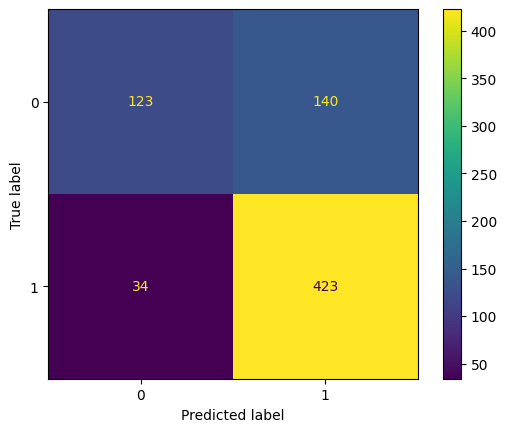

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df["ground_truth"], df["pred"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [16]:
len(df[~df["ground_truth"]])

263

In [ ]:
# TODO: Test set evalutation

from dataset import BinaryTDMSDataset, PATH

test_dataset = BinaryTDMSDataset(PATH.TEST)

def get_index(folder):
    return [i for i, t, j in test_dataset.all_paths].index(folder)

i, tex, jsn = test_dataset.__getitem__(get_index("0706.0014"))
